#Navigating the Courtside Advantage in the NBA

Welcome to the world of professional basketball, where the cheers of the crowd, the squeak of sneakers on the hardwood, and the thrill of victory echo through the arenas. In the heart of this dynamic environment lies a phenomenon that has intrigues fans and analysts alike for decades -- the elusive yet powerful concept of homecourt advantage.

###The NBA Universe
The National Basketball Association (NBA), is a premier professional basketball league where the best athletes from around the globe come together to compete at the highest level. With a complex system of conferences, divisions, and an 82-game regular season, the NBA is a melting pot of talent, strategy, and unpredictable outcomes.

###Homecourt Advantage
Our journey begins with the exploration of a statistical enigma: homecourt advantage. Do teams tend to perform better when playing on their home court? Does this also affect individual player statistics?

To unravel these mysteries, I delved into the vast sea of NBA data, seeking answers in player statistics, team dynamics, and game outcomes. The data, meticulously sourced from ESPN, provided a treasure trove of insights waiting to be uncovered.

###The Quest for Data
ESPN, the sports network synonymous with comprehensive coverage and in-depth analysis, served as the gateway to my data-driven adventure. Navigating through their extensive databases, I curated a dataset that spans the 2022-23 NBA season. This data encompasses team performance metrics, player statistics, and game details, laying the foundation for a thorough exploration of the impact of homecourt advantage.

###A Glimpse into the Methodology
In true data science fashion, my analytical journey emcompasses the use of Python and the powerful Pandas library. Armed with these tools, I've engaged in data wrangling, exploratory analysis, and visualization to bring this story to life.

###Questions
* How does homecourt advantage influence win-loss records and point differentials of NBA teams during to 2022-23 season?
* Do specific NBA teams demonstrate stronger or weaker homecourt advantages?
* Is there a noticeable difference in the influence of homecourt advantage between the Eastern and Western Conferences?
* How does homecourt advantage manifest for the Boston Celtics, and how does it compare to the Dallas Mavericks during the 2022-23 season?
* Does homecourt advantage affect the season statistics of NBA MVP-caliber players, such as Jayson Tatum and Luka Doncic?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

#NBA Team Overall 2022-23 Season

As we navigate the expansive sea of NBA data, let's clarify the key column names that might be less intuitive:

* **Abbr**: Team Name Abbreviation
* **W**: Wins
* **L**: Losses
* **PCT**: Winning Percentage
* **GB**: Games Behind
* **HOME**: Home Game Record
* **AWAY**: Away Game Record
* **DIV**: Division Record
* **CONF**: Conference Record
* **PPG**: Points per Game
* **OPP PPG**: Opponent Points per Game
* **DIFF**: Point Differential
* **STRK**: Win-Loss Streak
* **L10**: Last 10 Games Record
* **HOME_W**: Home Wins
* **HOME_L**: Home Losses
* **AWAY_W**: Away Wins
* **AWAY_L**: Away Losses
* **HOME_W%**: Home Winning Percentage
* **AWAY_W%**: Away Winning Percentage

Now that we're acquainted, let's load our data from ESPN and organize it for analysis.

Let's load the data and organize the Eastern Conference team names.

In [2]:
nba_data = pd.read_html('https://www.espn.com/nba/standings/_/season/2023')

Our dataset is divided into 4 parts: Eastern Team Names, Eastern Statistics, Western Team Names, and Western Statisitcs. Let's organize all of this data into one dataframe.

In [3]:
east_conf = nba_data[0]

In [4]:
east_conf[['Abbr', 'Team']] = east_conf.iloc[:, 0].str.extract(r'--(\w{3})(.*)')
east_conf['Conference'] = 'East'

east_conf.loc[3, 'Abbr'] = 'NY'
east_conf.loc[3, 'Team'] = 'New York Knicks'

east_conf = east_conf.drop('* --MILMilwaukee Bucks', axis = 1)

east_conf.loc[-1] = ['MIL', 'Milwaukee Bucks', 'East']
east_conf.index = east_conf.index + 1
east_conf.sort_index(inplace=True)

east_conf.reset_index(drop=True, inplace=True)

In [5]:
east_conf.head()

,Abbr,Team,Conference
0,MIL,Milwaukee Bucks,East
1,BOS,Boston Celtics,East
2,PHI,Philadelphia 76ers,East
3,CLE,Cleveland Cavaliers,East
4,NY,New York Knicks,East


Now, let's do the same for the Western Conference and combine them into one dataframe.

In [6]:
west_conf = nba_data[2]

In [7]:
west_conf[['Abbr', 'Team']] = west_conf.iloc[:, 0].str.extract(r'--(\w{3})(.*)')
west_conf['Conference'] = 'West'

west_conf.loc[4, 'Abbr'] = 'GS'
west_conf.loc[4, 'Team'] = 'Golden State Warriors'
west_conf.loc[8, 'Abbr'] = 'NO'
west_conf.loc[8, 'Team'] = 'New Orleans Pelicans'
west_conf.loc[10, 'Abbr'] = 'UTAH'
west_conf.loc[10, 'Team'] = 'Utah Jazz'
west_conf.loc[13, 'Abbr'] = 'SA'
west_conf.loc[13, 'Team'] = 'San Antonio Spurs'

west_conf = west_conf.drop('z --DENDenver Nuggets', axis=1)

west_conf.loc[-1] = ['DEN', 'Denver Nuggets', 'West']
west_conf.index = west_conf.index + 1
west_conf.sort_index(inplace=True)

west_conf.reset_index(drop=True, inplace=True)

In [8]:
west_conf.head()

,Abbr,Team,Conference
0,DEN,Denver Nuggets,West
1,MEM,Memphis Grizzlies,West
2,SAC,Sacramento Kings,West
3,PHX,Phoenix Suns,West
4,LAC,LA Clippers,West


In [9]:
combined_conf = pd.concat([east_conf, west_conf], ignore_index=True)

In [10]:
combined_conf.head()

,Abbr,Team,Conference
0,MIL,Milwaukee Bucks,East
1,BOS,Boston Celtics,East
2,PHI,Philadelphia 76ers,East
3,CLE,Cleveland Cavaliers,East
4,NY,New York Knicks,East


Now that we have the team names sorted, let's move on to the interesting statistics.

In [11]:
east_stats = nba_data[1]
west_stats = nba_data[3]

In [12]:
east_west_stats = pd.concat([east_stats, west_stats], ignore_index=True)

In [13]:
east_west_stats.head()

,W,L,PCT,GB,HOME,AWAY,DIV,CONF,PPG,OPP PPG,DIFF,STRK,L10
0,58,24,0.707,-,32-9,26-15,11-5,35-17,116.9,113.3,3.6,L2,6-4
1,57,25,0.695,1,32-9,25-16,11-5,34-18,117.9,111.4,6.5,W3,8-2
2,54,28,0.659,4,29-12,25-16,10-6,34-18,115.2,110.9,4.3,W2,5-5
3,51,31,0.622,7,31-10,20-21,13-3,34-18,112.3,106.9,5.4,L1,7-3
4,47,35,0.573,11,23-18,24-17,8-8,32-20,116.0,113.1,2.9,L2,5-5


Combine all the data into one dataframe.

In [14]:
season_stats = pd.concat([combined_conf, east_west_stats], axis=1)

In [15]:
season_stats.head()

,Abbr,Team,Conference,W,L,PCT,GB,HOME,AWAY,DIV,CONF,PPG,OPP PPG,DIFF,STRK,L10
0,MIL,Milwaukee Bucks,East,58,24,0.707,-,32-9,26-15,11-5,35-17,116.9,113.3,3.6,L2,6-4
1,BOS,Boston Celtics,East,57,25,0.695,1,32-9,25-16,11-5,34-18,117.9,111.4,6.5,W3,8-2
2,PHI,Philadelphia 76ers,East,54,28,0.659,4,29-12,25-16,10-6,34-18,115.2,110.9,4.3,W2,5-5
3,CLE,Cleveland Cavaliers,East,51,31,0.622,7,31-10,20-21,13-3,34-18,112.3,106.9,5.4,L1,7-3
4,NY,New York Knicks,East,47,35,0.573,11,23-18,24-17,8-8,32-20,116.0,113.1,2.9,L2,5-5


Great! But we need more information, like splitting the HOME and AWAY records.

In [16]:
season_stats[['HOME_W', 'HOME_L']] = season_stats['HOME'].str.split('-', expand=True)
season_stats[['AWAY_W', 'AWAY_L']] = season_stats['AWAY'].str.split('-', expand=True)

season_stats[['HOME_W', 'HOME_L', 'AWAY_W', 'AWAY_L']] = season_stats[['HOME_W', 'HOME_L', 'AWAY_W', 'AWAY_L']].astype(int)

Let's add the Home and Away Winning Percentages too.

In [17]:
season_stats['HOME_W%'] = (season_stats['HOME_W'] / (season_stats['HOME_W'] + season_stats['HOME_L'])).round(2) * 100
season_stats['AWAY_W%'] = (season_stats['AWAY_W'] / (season_stats['AWAY_W'] + season_stats['AWAY_L'])).round(2) * 100

In [18]:
season_stats.head()

,Abbr,Team,Conference,W,L,PCT,GB,HOME,AWAY,DIV,...,OPP PPG,DIFF,STRK,L10,HOME_W,HOME_L,AWAY_W,AWAY_L,HOME_W%,AWAY_W%
0,MIL,Milwaukee Bucks,East,58,24,0.707,-,32-9,26-15,11-5,...,113.3,3.6,L2,6-4,32,9,26,15,78.0,63.0
1,BOS,Boston Celtics,East,57,25,0.695,1,32-9,25-16,11-5,...,111.4,6.5,W3,8-2,32,9,25,16,78.0,61.0
2,PHI,Philadelphia 76ers,East,54,28,0.659,4,29-12,25-16,10-6,...,110.9,4.3,W2,5-5,29,12,25,16,71.0,61.0
3,CLE,Cleveland Cavaliers,East,51,31,0.622,7,31-10,20-21,13-3,...,106.9,5.4,L1,7-3,31,10,20,21,76.0,49.0
4,NY,New York Knicks,East,47,35,0.573,11,23-18,24-17,8-8,...,113.1,2.9,L2,5-5,23,18,24,17,56.0,59.0


###Visualizing our Data

Continuing our exploration of the NBA's 2022-23 season, let's interpret the visuals created by our charts.

Let's begin with a bar graph contrasting the home and away percentages for all NBA teams.

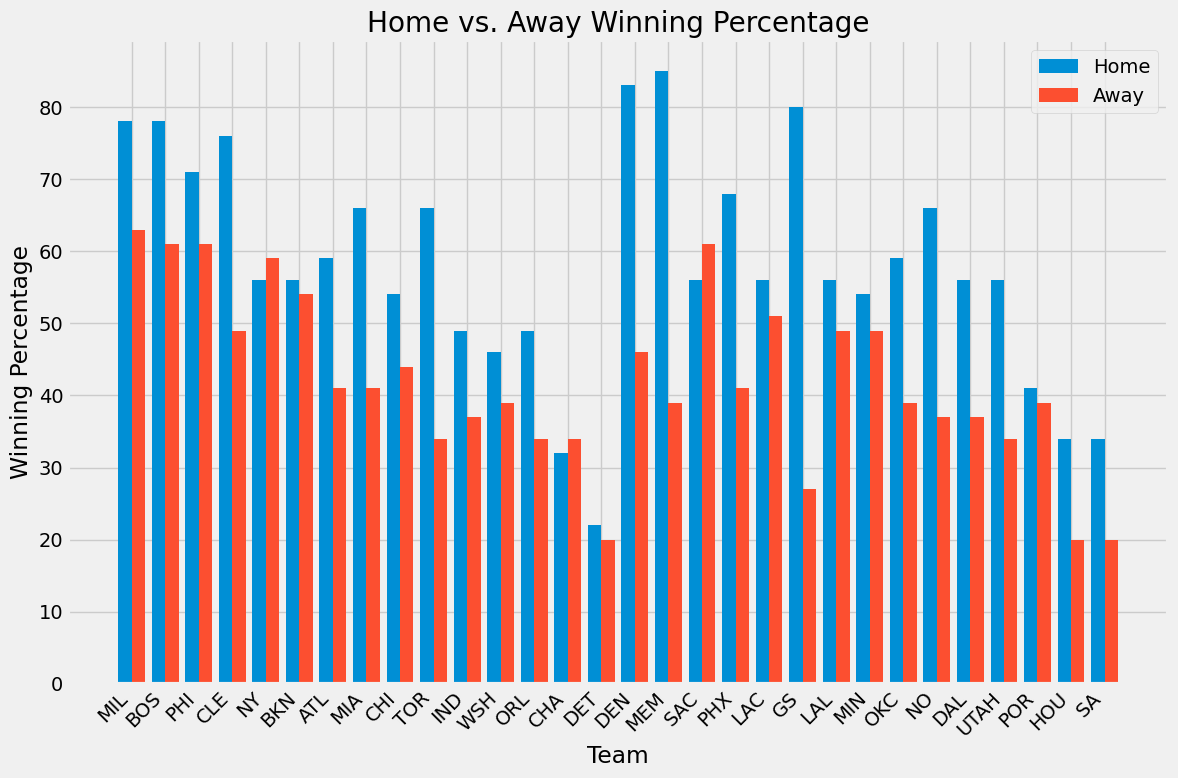

In [19]:
width = 0.4
teams = season_stats['Abbr']
x = np.arange(len(teams))

plt.figure(figsize=(12, 8))

plt.bar(x - width/2, season_stats['HOME_W%'], width=width, label='Home')
plt.bar(x + width/2, season_stats['AWAY_W%'], width=width, label='Away')

plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.title('Home vs. Away Winning Percentage')
plt.xticks(x, teams, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In this bar graph, we observe a common trend: most NBA teams exhibit a higher home winning percentage than away. The Denver Nuggets (DEN), Memphis Grizzlies (MEM), Golden State Warriors (GS), and Cleveland Cavaliers (CLE) stand out with notable differences, showcasing the substantial influence of homecourt advantage. However, teams like the Charlotte Hornets (CHA), Sacramento Kings (SAC), and the New York Knicks (NY) seem less swayed by the location of their games, maintaining a relatively even performance throughout the 2022-23 season, regardless of venue. This answers the question of whether specific NBA teams demonstrate stronger or weaker homecourt advantages. The answer is affirmative, with clear distinctions between teams that heavily benefit from homecourt advantage and those that exhibit a more balanced performance irrespective of venue.

Next, let's create a scatter plot exploring the relationship between home win percentage and average point differential for each team.

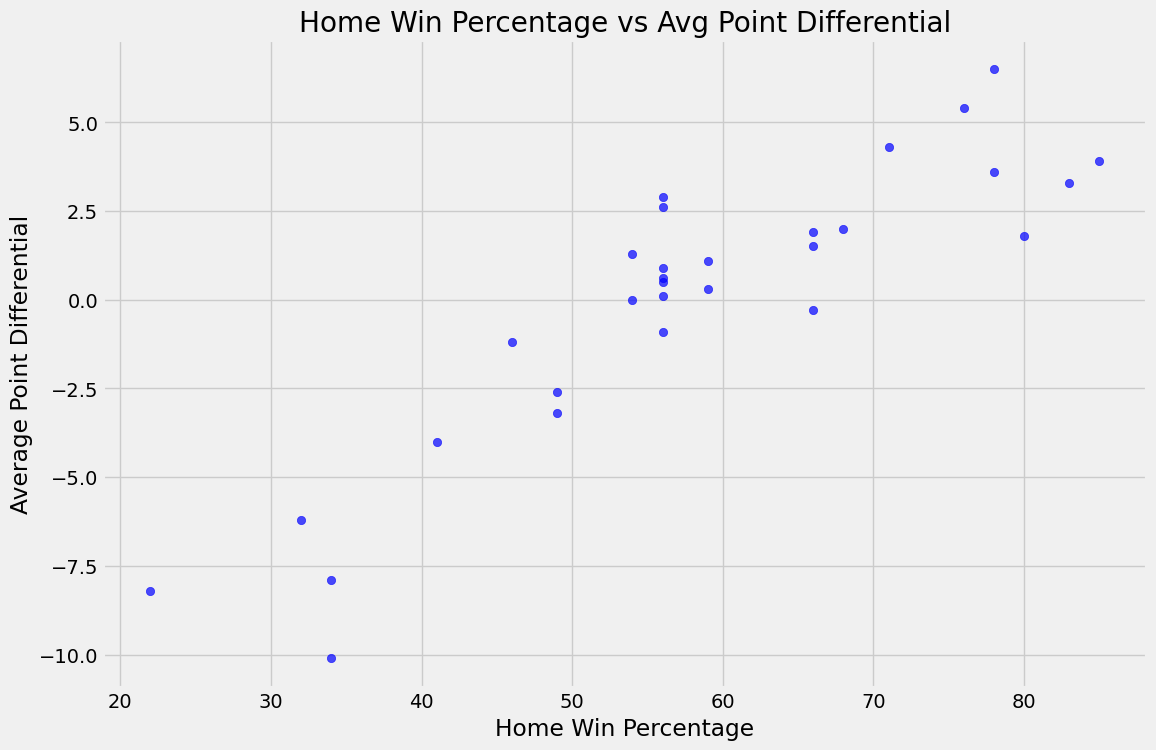

In [20]:
plt.figure(figsize=(12, 8))

plt.scatter(season_stats['HOME_W%'], season_stats['DIFF'], c='blue', alpha=0.7)
plt.title('Home Win Percentage vs Avg Point Differential')
plt.xlabel('Home Win Percentage')
plt.ylabel('Average Point Differential')

plt.show()

This scatter plot unveils a compelling narrative. As we examine the relationship between home win percentage and average point differential, an upward, almost linear trend emerges. This suggests that teams with a higher home win percentage tend to have a more favorable average point differential, emphasizing the impact of homecourt advantage on a team's scoring margin.

Lastly, let's create a bar plot categorizing the average home win percentage by conference.

/tmp/ipython-input-1663243530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conference', y='HOME_W%', data=season_stats, palette=['blue', 'red'], errorbar=None)


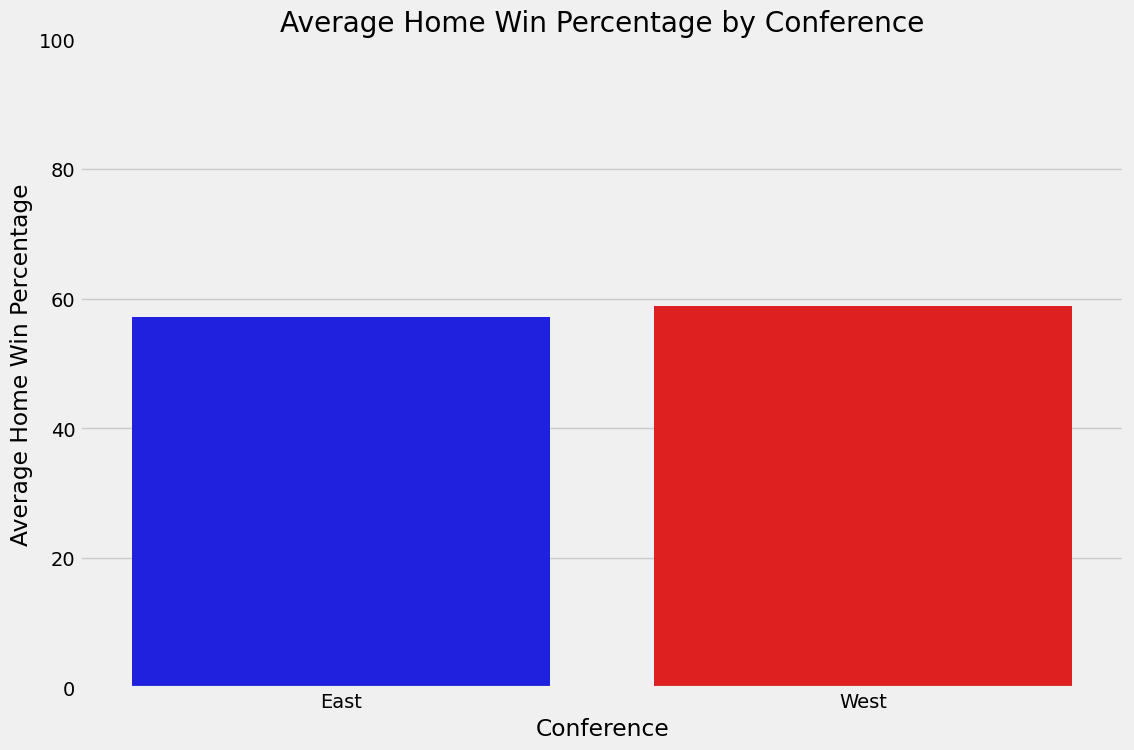

In [21]:
plt.figure(figsize=(12, 8))

sns.barplot(x='Conference', y='HOME_W%', data=season_stats, palette=['blue', 'red'], errorbar=None)
plt.title('Average Home Win Percentage by Conference')
plt.xlabel('Conference')
plt.ylabel('Average Home Win Percentage')
plt.ylim(0, 100)

plt.show()

The final graph in our visual exploration compares the average home win percentage by conference. With a slight preference for the Western Conference, the bar plot suggests subtle differences in homecourt advantage. This insight sets the stage for a deeper dive into the factors contributing to these disparities, offering a glimpse into the competitive dynamics within each conference. This answers the question of whether there is a noticeable difference in the influence of homecourt advantage between the Eastern and Western Conferences. The answer is yes, with the Western Conference showing a slightly higher average home win percentage, suggesting that homecourt advantage might manifest differently in each conference.

#Game-by-Game Statistics 2022-23 Season

As we transition from exploring team performance and homecourt advantage in the NBA to a deeper analysis of individual game data, we embark on a new chapter of our basketball journey. Our previous dataset provided a macroscopic view, offering insights into how teams navigated the season, particularly in the context of homecourt advantage. Now, our focus narrows to each game, unraveling the intricacies that shape the outcomes on the hardwood.

The new dataset, comprising individual game detials from the 2022-23 NBA season, serves as a complement to our previous team-centric exploration. WHile the team dataset allowed us to understand overarching trends and patterns, this game-level data delves into the nuances of each matchup. We transition from the broad strokes of win percentages and point differentials to a granular examination of scores, team matchups, and the ebb and flow of victories between home and away teams.

Our journey through this game-level dataset will unearth not only who emerged victorious but also the dynamics that fueled these outcomes. From examining score differentials to understanding the distribution of wins between home and away teams, we aim to enrich our understanding of the factors that contribute to success on the NBA courts. So, fasten your seatbelts as we navigate the twists and turns of individual game narratives, unlocking the stories behind the scores and the strategies that define them.

Now, let's load our game data, organize it, and extract relevant information for our analysis.

In [22]:
game_data_1018 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20221018')
game_data_1025 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20221025')
game_data_1101 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20221101')
game_data_1108 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20221108')
game_data_1115 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20221115')
game_data_1122 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20221122')
game_data_1129 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20221129')
game_data_1206 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20221206')
game_data_1213 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20221213')
game_data_1220 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20221220')
game_data_1227 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20221227')
game_data_0103 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230103')
game_data_0110 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230110')
game_data_0117 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230117')
game_data_0124 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230124')
game_data_0131 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230131')
game_data_0207 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230207')
game_data_0214 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230214')
game_data_0221 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230221')
game_data_0228 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230228')
game_data_0307 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230307')
game_data_0314 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230314')
game_data_0321 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230321')
game_data_0328 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230328')
game_data_0404 = pd.read_html('https://www.espn.com/nba/schedule/_/date/20230404')

In [23]:
game_data_1018 = pd.concat(game_data_1018, ignore_index=True)
game_data_1025 = pd.concat(game_data_1025, ignore_index=True)
game_data_1101 = pd.concat(game_data_1101, ignore_index=True)
game_data_1108 = pd.concat(game_data_1108, ignore_index=True)
game_data_1115 = pd.concat(game_data_1115, ignore_index=True)
game_data_1122 = pd.concat(game_data_1122, ignore_index=True)
game_data_1129 = pd.concat(game_data_1129, ignore_index=True)
game_data_1206 = pd.concat(game_data_1206, ignore_index=True)
game_data_1213 = pd.concat(game_data_1213, ignore_index=True)
game_data_1220 = pd.concat(game_data_1220, ignore_index=True)
game_data_1227 = pd.concat(game_data_1227, ignore_index=True)
game_data_0103 = pd.concat(game_data_0103, ignore_index=True)
game_data_0110 = pd.concat(game_data_0110, ignore_index=True)
game_data_0117 = pd.concat(game_data_0117, ignore_index=True)
game_data_0124 = pd.concat(game_data_0124, ignore_index=True)
game_data_0131 = pd.concat(game_data_0131, ignore_index=True)
game_data_0207 = pd.concat(game_data_0207, ignore_index=True)
game_data_0214 = pd.concat(game_data_0214, ignore_index=True)
game_data_0221 = pd.concat(game_data_0221, ignore_index=True)
game_data_0228 = pd.concat(game_data_0228, ignore_index=True)
game_data_0307 = pd.concat(game_data_0307, ignore_index=True)
game_data_0314 = pd.concat(game_data_0314, ignore_index=True)
game_data_0321 = pd.concat(game_data_0321, ignore_index=True)
game_data_0328 = pd.concat(game_data_0328, ignore_index=True)
game_data_0404 = pd.concat(game_data_0404, ignore_index=True)

In [24]:
all_games = pd.concat([game_data_1018, game_data_1025, game_data_1101, game_data_1108, game_data_1115,
                     game_data_1122, game_data_1129, game_data_1206, game_data_1213, game_data_1220,
                     game_data_1227, game_data_0103, game_data_0110, game_data_0117, game_data_0124,
                     game_data_0131, game_data_0207, game_data_0214, game_data_0221, game_data_0228,
                     game_data_0307, game_data_0314, game_data_0321, game_data_0328, game_data_0404],
                    ignore_index=True)

In [25]:
all_games

,MATCHUP,MATCHUP.1,result,winner high,loser high
0,Philadelphia,@ Boston,"BOS 126, PHI 117",Jayson Tatum35 Pts,James Harden35 Pts
1,Los Angeles,@ Golden State,"GS 123, LAL 109",Stephen Curry33 Pts,LeBron James31 Pts
2,Orlando,@ Detroit,"DET 113, ORL 109",Bojan Bogdanovic24 Pts,Paolo Banchero27 Pts
3,Washington,@ Indiana,"WSH 114, IND 107",Bradley Beal23 Pts,Tyrese Haliburton26 Pts
4,Houston,@ Atlanta,"ATL 117, HOU 107",John Collins24 Pts,Kevin Porter Jr.21 Pts
...,...,...,...,...,...
1227,Memphis,@ Oklahoma City,"OKC 115, MEM 100",Jared Butler25 Pts,Kenneth Lofton Jr.42 Pts
1228,Sacramento,@ Denver,"DEN 109, SAC 95",Bruce Brown21 Pts,Harrison Barnes17 Pts
1229,Utah,@ Los Angeles,"LAL 128, UTAH 117",LeBron James36 Pts,Kris Dunn26 Pts
1230,LA,@ Phoenix,"LAC 119, PHX 114",Norman Powell29 Pts,Saben Lee25 Pts


In [26]:
all_games.drop(['winner high', 'loser high'], axis=1, inplace=True)

In [27]:
all_games = all_games.rename(columns={'MATCHUP': 'away_team', 'MATCHUP.1': 'home_team'})

In [28]:
team_abbreviations = {'Atlanta': 'ATL', 'Boston': 'BOS','Brooklyn': 'BKN','Charlotte': 'CHA','Chicago': 'CHI','Cleveland': 'CLE','Dallas': 'DAL','Denver': 'DEN','Detroit': 'DET','Golden State': 'GS','Houston': 'HOU',
                      'Indiana': 'IND','LA': 'LAC','Los Angeles': 'LAL','Memphis': 'MEM','Miami': 'MIA','Milwaukee': 'MIL','Minnesota': 'MIN','New Orleans': 'NO','New York': 'NY','Oklahoma City': 'OKC','Orlando': 'ORL',
                      'Philadelphia': 'PHI','Phoenix': 'PHX', 'Portland': 'POR','Sacramento': 'SAC','San Antonio': 'SA','Toronto': 'TOR','Utah': 'UTAH','Washington': 'WSH',}

In [29]:
all_games['home_abbr'] = all_games['home_team'].str.replace('@ ', '').map(team_abbreviations)
all_games['away_abbr'] = all_games['away_team'].map(team_abbreviations)

In [30]:
scores = all_games['result'].str.extract(r'([A-Z]+) (\d+), ([A-Z]+) (\d+)')

is_home_team = all_games['home_abbr'] == scores[0]
all_games['home_score'] = pd.to_numeric((scores[1] * is_home_team) + (scores[3] * ~is_home_team))
all_games['away_score'] = pd.to_numeric((scores[3] * is_home_team) + (scores[1] * ~is_home_team))

In [31]:
all_games['point_diff'] = all_games['home_score'] - all_games['away_score']

In [32]:
all_games['home_win'] = all_games['home_score'] > all_games['away_score']

In [33]:
all_games['home_team'] = all_games['home_team'].str.replace('@', '')

We don't need the All-Star game for our analysis, let's remove it.

In [34]:
all_games = all_games.drop(885)
all_games = all_games.reset_index(drop=True)

In [35]:
all_games.head()

,away_team,home_team,result,home_abbr,away_abbr,home_score,away_score,point_diff,home_win
0,Philadelphia,Boston,"BOS 126, PHI 117",BOS,PHI,126.0,117.0,9.0,True
1,Los Angeles,Golden State,"GS 123, LAL 109",GS,LAL,123.0,109.0,14.0,True
2,Orlando,Detroit,"DET 113, ORL 109",DET,ORL,113.0,109.0,4.0,True
3,Washington,Indiana,"WSH 114, IND 107",IND,WSH,107.0,114.0,-7.0,False
4,Houston,Atlanta,"ATL 117, HOU 107",ATL,HOU,117.0,107.0,10.0,True


###Visualizing our Data

Now, let's
Let's begin with a bar graph illustrating the distribution of home team wins and losses.

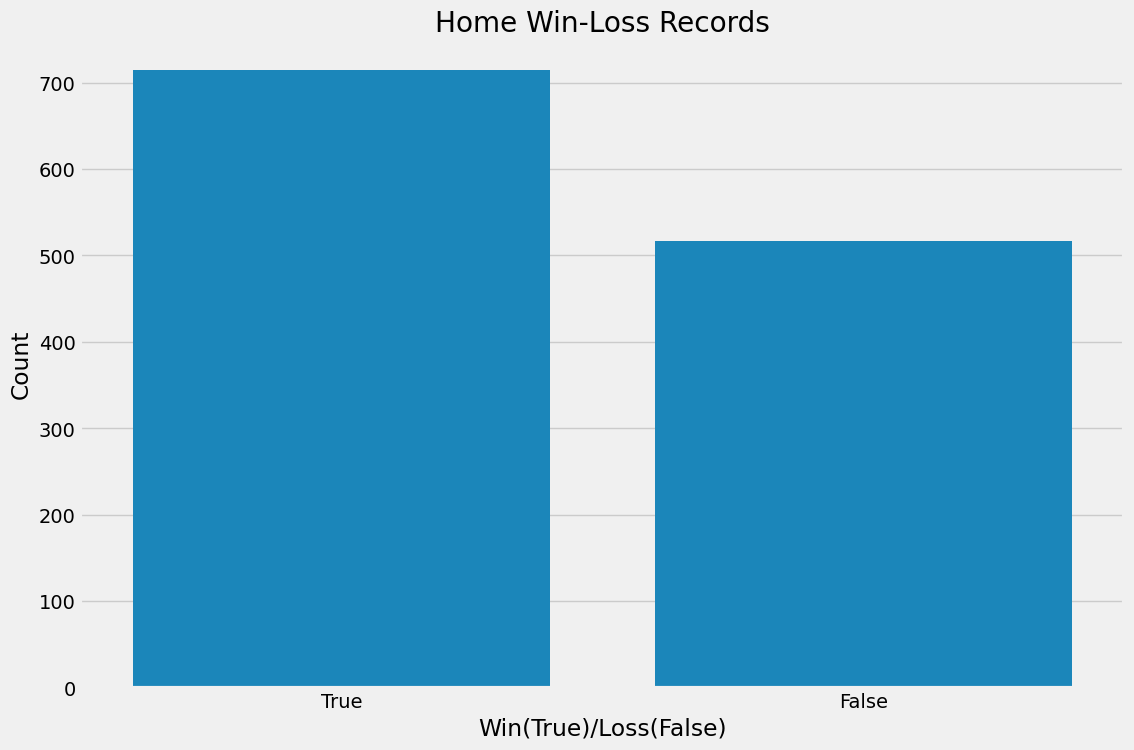

In [36]:
plt.figure(figsize=(12, 8))

sns.countplot(x='home_win', data=all_games, order=[True, False])
plt.title('Home Win-Loss Records')
plt.xlabel('Win(True)/Loss(False)')
plt.ylabel('Count')

plt.show()

In this bar graph, we observe a notable disparity between the number of home wins and losses, providing a compelling insight into the phenomenon of homecourt advantage. The significantly higher count of home wins suggests a prevailing trend--teams, on average, tend to perform better when playing on their home court. This observation alighns with the widely acknowledged concept of homecourt advantage in basketball, where factors like familiarity with the arena, support from local fans, and the comfort of home surroundings contribute to an elevated performance level. This addresses the question of how homecourt advantage influences win-loss records. The visual representation emphasizes the significance of the homecourt advantage, a dynamic that echoes through the fabric of the NBA and influenced team outcomes during the 2022-23 season.

Next, this scatterplot illustrates the relationship between home and away scores for each game.

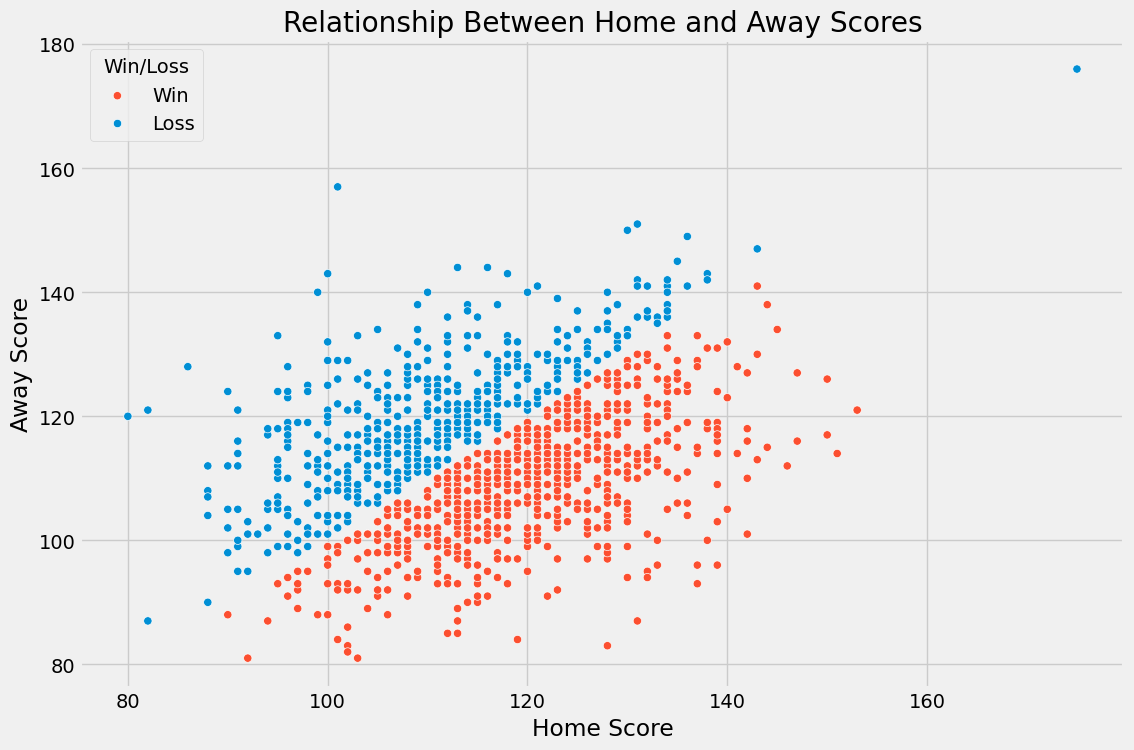

In [37]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='home_score', y='away_score', hue='home_win', data=all_games)
plt.title('Relationship Between Home and Away Scores')
plt.xlabel('Home Score')
plt.ylabel('Away Score')
plt.legend(title='Win/Loss', labels=['Win', 'Loss'], loc='upper left')

plt.show()

This scatterplot serves as a valuable visual tool for unraveling the complexities of game scores and outcomes, shedding light on the interplay between home and away performances. By categorizing points into different quadrants, we can extract insightful details about the nature of each game. Quadrant 1, for instance, captures instances where the home team emerged victorious in high-scoring affairs, showcasing their dominance. On the flip side, Quadrant 2 highlights competitive games where the home team faced a formidable opponent but ultimately fell short. Quadrant 3 delves into scenarios where the home team struggled, resulting in a loss in low-scoring encounters. Lastly, Quadrant 4 encapsulates games where the home team clinched victory in a low-scoring context, suggesting a resilient performance despite modest scores. Categorizing points into different quadrants provides a detailed understanding of the nature of each game, directly addressing how homecourt advantage influences the dynamics of individual games. The quadrants offer clear insights into scenarios such as high-scoring victories, competitive losses, struggles resulting in low-scoring defeats, and resilient low-scoring victories, elucidating the diverse manifestations of homecourt advantage.

Next, let's look at the distribution of wins between home and away games.

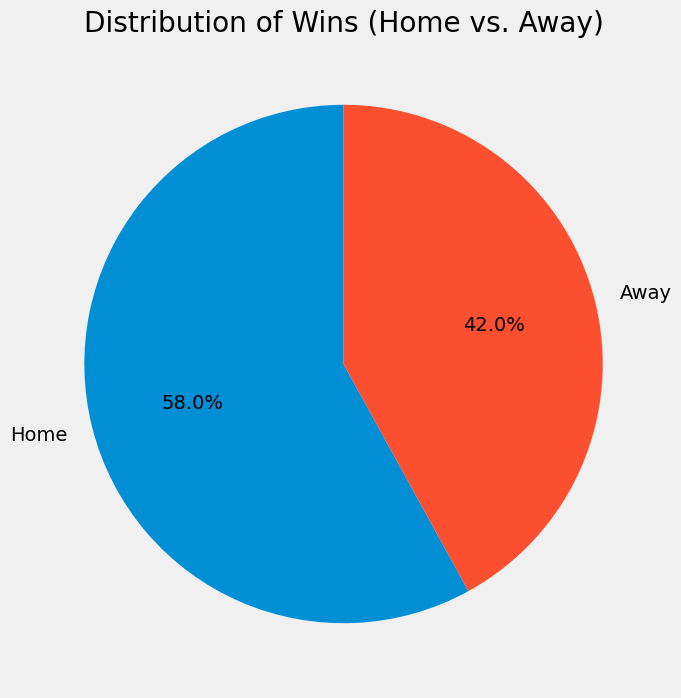

In [38]:
plt.figure(figsize=(12, 8))

all_games['win_location'] = np.where(all_games['home_win'], 'Home', 'Away')
win_counts = all_games['win_location'].value_counts()
plt.pie(win_counts, labels=win_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Wins (Home vs. Away)')

plt.show()

This pie chart elegantly distills the distribution of wins between home and away games, providing a comprehensive snapshot of team performances in different settings. At first glance, the chart reveals that home wins constitute a dominant share, comprising 58% of the total victories. This sizable portion suggest a notable preference for teams to secure wins on their home court, highlighting once again, the significance of homecourt advantage.

On the flip side, away wins occupy a respectable 42% of the pie, indicating that teams can indeed triumph in the face of the challenges posed by playing on the road. The juxtaposition of these percentages serves as a visual testament to the intriguing contrast between home and away performances in the NBA during the 2022-23 season. The dominance of home wins (58%) and respectable away wins (42%) directly addresses the question of how homecourt advantage influences win-loss records and demonstrates a noticeable disparity. This pie chart encapsulates the essence of the teams' wins, illustrating the competitive dynamics across different game locations.

Next, this dual-bar chart showcases the average point differentials in the context of home wins and losses.

<Figure size 1200x800 with 0 Axes>

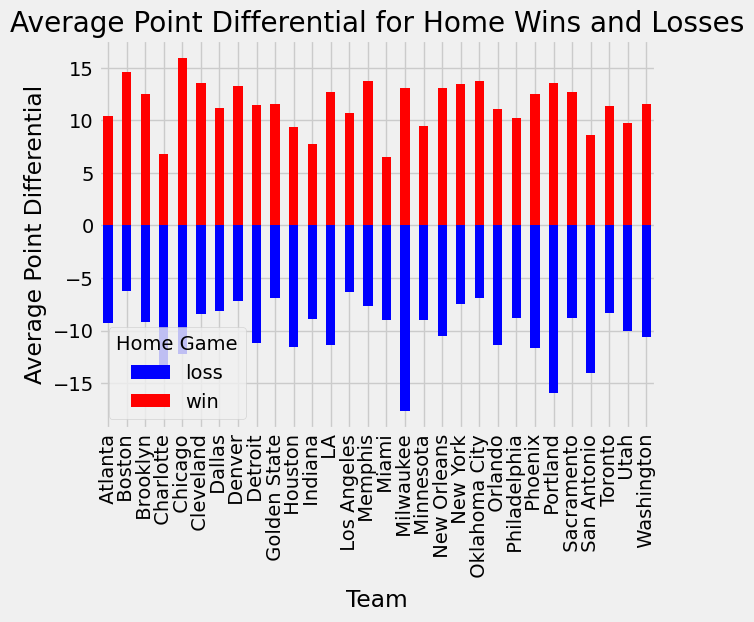

In [39]:
team_performance = all_games.groupby(['home_team', 'home_win'])['point_diff'].mean().unstack()

plt.figure(figsize=(12, 8))

team_performance.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Average Point Differential for Home Wins and Losses')
plt.xlabel('Team')
plt.ylabel('Average Point Differential')
plt.legend(title='Home Game', labels=['loss', 'win'])

plt.show()

This dual-bar chart provides a nuanced exploration of team performance by illustrating the average point differentials for home wins and losses for each team throughout the 2022-23 season. Each team is represented by two bars: red and blue. The red bar signifies the average point differential for home victories, while the blue bar shows the corresponding metric for home losses.

The overall dominance of red bars over blue in this chart indicates a prevailing trend of teams generally performing better in terms of average point differentials during home wins compared to home losses. This aligns with the conventional understanding of homecourt advantage, where teams often showcase enhanced capabilities and stronger gameplay in their familiar surroundings.

However, the presence of outliers, such as Charlotte, Milwaukee, Portland, and San Antonio, introduces an intriguing dimension to this narrative. These teams deviate from the broader pattern by exhibiting instances where their average point differentials in home losses surpass those in home wins. This anomaly suggests that, for these specific teams, certain factors may contribute to stronger performances even in the face of a home defeat.

This chart addresses how homecourt advantage influences the point differentials of NBA teams. The dominance of red bars over blue indicates that teams generally perform better in terms of average point differentials during home wins, aligning with the conventional understanding of homecourt advantage. Outliers, like Charlotte, Milwaukee, Portland, and San Antonio, introduce complexity, answering the question of whether specific teams demonstrate stronger or weaker homecourt advantages.

Exploring the circumstances surrounding these outliers, such as team dynamics, player strategies, or opponent matchups, could unveil unique insights into the dynamics of these teams. It adds a layer of complexity to the conventional understanding of homecourt advantage, prompting a deeper investigation into the factors that shape team performance under varying conditions.

Finally, this next graph displays the average point differential for each team, categorized into two subplots: one for home games and one for away games.

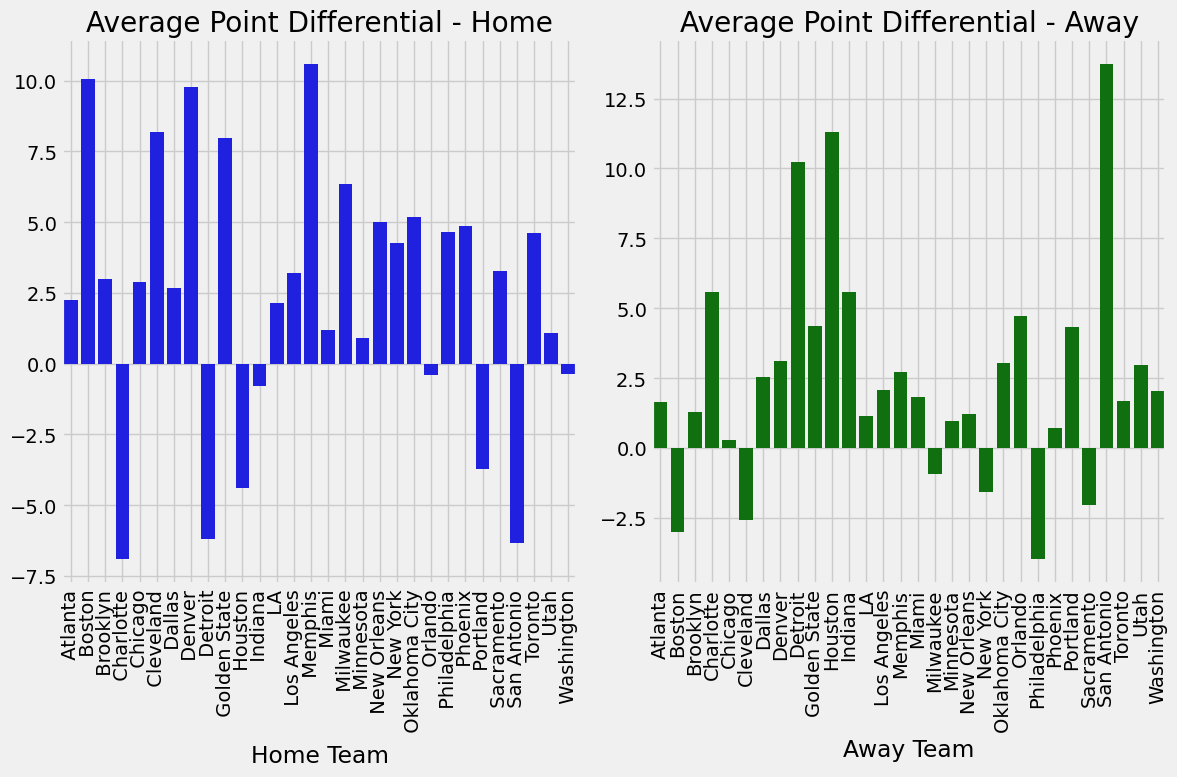

In [40]:
avg_diff_home = all_games.groupby('home_team')['point_diff'].mean()
avg_diff_away = all_games.groupby('away_team')['point_diff'].mean()

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.barplot(x=avg_diff_home.index, y=avg_diff_home.values, color='blue')
plt.title('Average Point Differential - Home')
plt.xlabel('Home Team')
plt.xticks(rotation=90)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(x=avg_diff_away.index, y=avg_diff_away.values, color='green')
plt.title('Average Point Differential - Away')
plt.xlabel('Away Team')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

The paired bar plots provide a comprehensive view of the average point differentials for each NBA team, distinctly illustrating the disparities between home and away games. In the majority of cases, teams showcase higher point differentials in home games, reinforcing the conventional notion of homecourt advantage. Notably, standout values for point differentials in home games for Boston, Denver, and Memphis emphasize the strength of their homecourt advantage. These teams performed exceptionally well in scoring compared to their opponents during home matches throughout the 2022-23 NBA season. The elevated point differentials for these teams in home games contribute to the overall trend of homecourt dominance, showcasing their ability to secure significant leads and outperform opponents in the comfort of their familiar arenas.

However, the intriguing presence of outliers, including Detroit, Houston, and San Antonio, introduces a captivating element to this observation. These teams defy the overall trend by demonstrating a preference for away games in terms of point differentials. This anomaly prompts a closer examination into the unique dynamics and strategies employed by these teams when competing on the road.

Possible explanations for these outliers could include a tactical emphasis on away-game performance, certain player strengths aligning better with the challenges of away matchups, or specific opponent weaknesses exploited more effectively in away games.

#Boston Celtics 2022-23 Season

Transitioning from the exploration of NBA team and game-level data for the 2022-23 season, we now shift our focus to a more specific analysis of the Boston Celtics' performance. Our previous dataset provided a holistic view of league-wide trends, including the influence of home-court advantage on teams' win-loss records and point differentials.

In this phase of our investigation, we delve into the intricacies of the Boston Celtics' games during the same season. This new dataset offers a more granular perspective, allowing us to examine the team's point differentials, game outcomes, and the manifestation of home-court advantage in greater detail.

As we progress, we'll compare the dynamics observed in the broader NBA dataset to the specific patterns unfolding in the Celtics' games. This comparative approach enhances our understanding of how a single team's performance aligns with league-wide trends, offering valuable insights into the intricacies of home-court advantage at the team level. So, let's embark on this focused exploration of the Boston Celtics' 2022-23 season and unravel the distinctive narratives within their game data.

Now, let's load our Celtics data, organize it, and extract relevant information for our analysis.

In [41]:
celtics_games = pd.read_html('https://www.espn.com/nba/team/schedule/_/name/bos/season/2023', header=0)

In [42]:
celtics_games = pd.concat(celtics_games, ignore_index=True)

In [43]:
celtics_games.columns = celtics_games.iloc[0]

In [44]:
celtics_games = celtics_games.drop(celtics_games.index[0])

In [45]:
celtics_games = celtics_games.reset_index(drop=True)

In [46]:
celtics_games.drop(['Hi Points', 'Hi Rebounds', 'Hi Assists'], axis=1, inplace=True)

In [47]:
celtics_games['WIN'] = celtics_games['RESULT'].str.startswith('W')

In [48]:
point_diff = celtics_games['RESULT'].str.extract(r'(\d+)-(\d+)').astype(int)

celtics_games['POINT DIFF'] = (celtics_games['WIN'] * (point_diff[0] - point_diff[1])) + ((~celtics_games['WIN']) * (point_diff[1] - point_diff[0]))

In [49]:
celtics_games['HOME'] = celtics_games['OPPONENT'].str.startswith('vs')

In [50]:
celtics_games.head()

,DATE,OPPONENT,RESULT,W-L,NaN,WIN,POINT DIFF,HOME
0,"Tue, Oct 18",vs Philadelphia,W126-117,1-0,NaN,True,9,True
1,"Fri, Oct 21",@ Miami,W111-104,2-0,NaN,True,7,False
2,"Sat, Oct 22",@ Orlando,W126-120,3-0,NaN,True,6,False
3,"Mon, Oct 24",@ Chicago,L120-102,3-1,NaN,False,-18,False
4,"Fri, Oct 28",vs Cleveland,L132-123 OT,3-2,NaN,False,-9,True


###Visualizing Our Data

We will begin with a bar chart that displays the point differentials for each Boston Celtics game over the season.

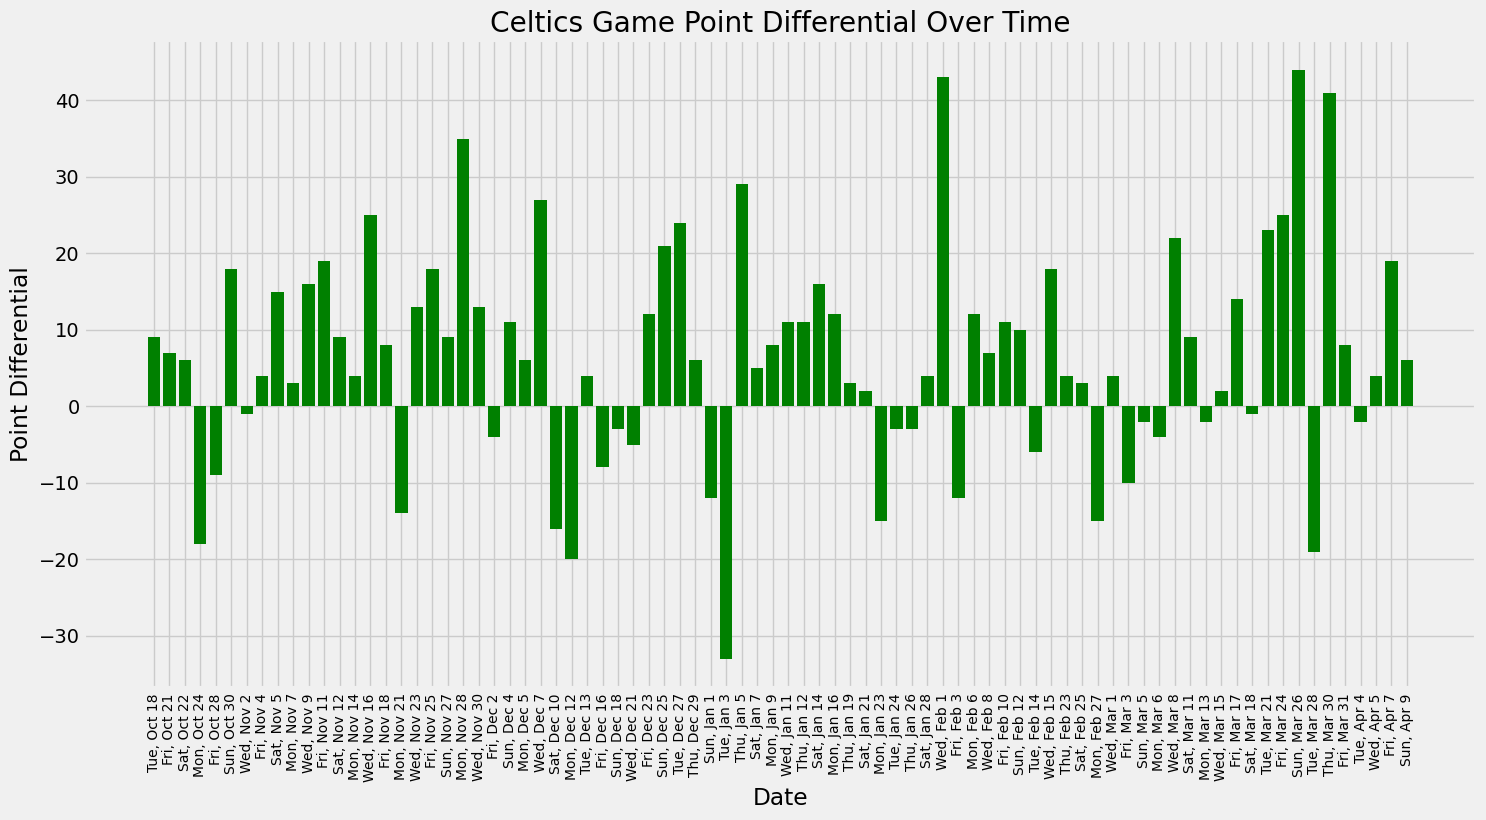

In [51]:
plt.figure(figsize=(16, 8))

plt.bar(celtics_games['DATE'], celtics_games['POINT DIFF'], color='g')
plt.title('Celtics Game Point Differential Over Time')
plt.xlabel('Date')
plt.ylabel('Point Differential')
plt.xticks(rotation='vertical', fontsize=10)
plt.grid(True)

plt.show()

The bar chart showcasing the Celtics' game point differentials over the course of the 2022-23 season provides a comprehensive visual overview of the team's performance. The positive values predominantly occupying the chart indicate instances where the Celtics outscored their opponents, reflecting overall success in both home and away games.

The consistent prevalence of positive point differentials suggests that the Celtics maintained a strong offensive presence and, correspondingly, a robust defense throughout the season. This trend is indicative of their ability to not only secure victories but also to do so with a considerable margin, contributing to an impressive overall performance.

While there are few noticeable negative values, indicating games where the Celtics were outscored, these instances appear to be outliers rather than defining the overall trajectory. The chart's emphasis on positive differentials aligns with the team's ability to effectively control and influence the outcomes of their games.

Moreover, the chart doesn't show a stark distinction between home and away games, suggesting that the Celtics maintained a consistent level of performance regardless of the game location. This observation aligns with the notion that the Celtics demonstrated a balanced approach, leveraging their strengths both on their home court and in away matchups.

In summary, this bar chart underscores the Celtics' overall success during the 2022-23 season, emphasizing their ability to secure positive point differentials consistently. The graph provides a snapshot of the team's resilience, effectiveness, and competitiveness, offering a positive narrative that transcends the traditional home-court advantage dynamics.

Let's dig a little deeper. We will look at a similar bar chart, but specifically focusing on home game point differention over the season.

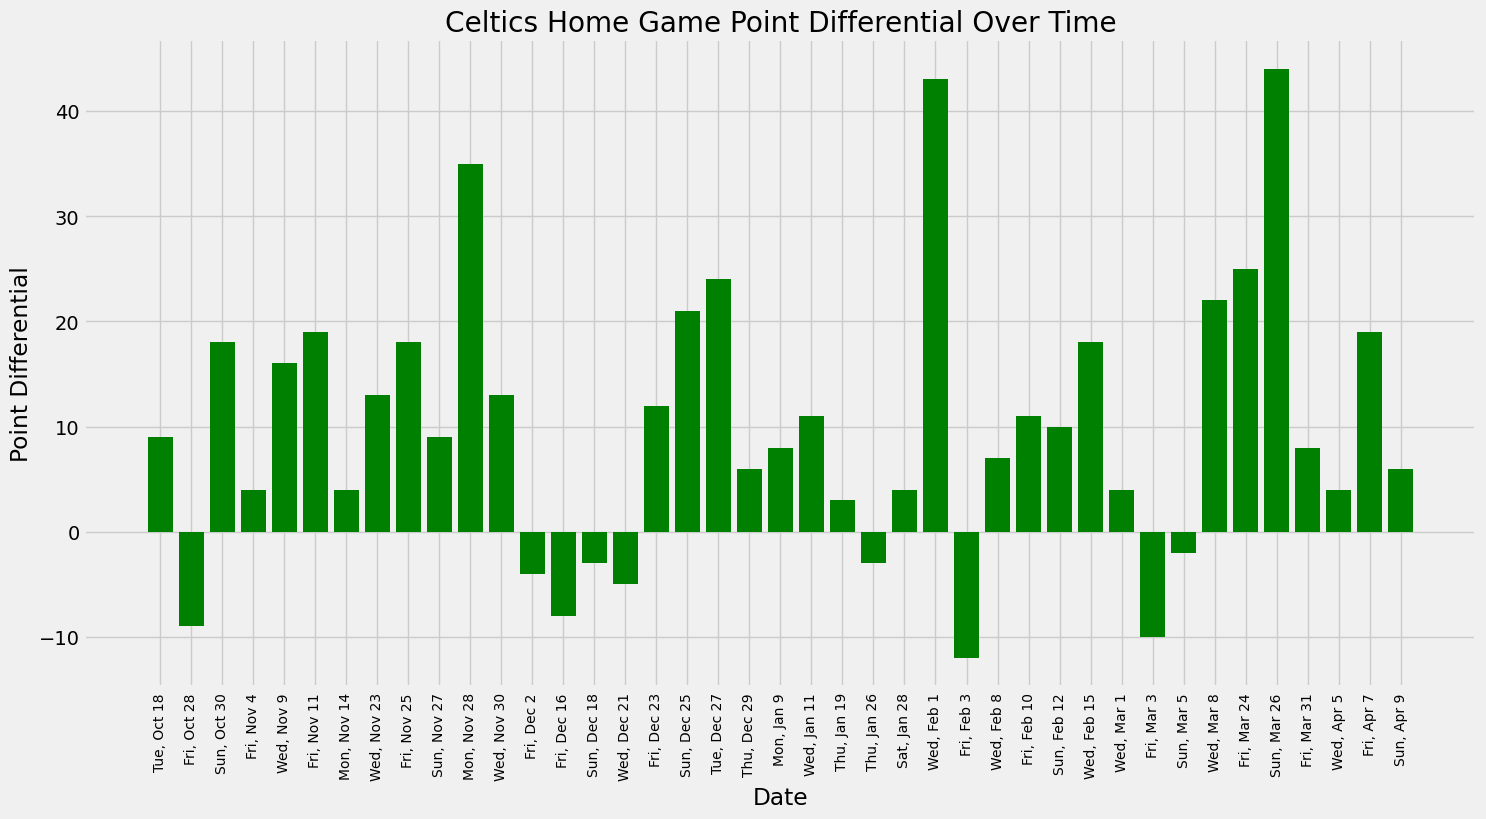

In [52]:
home_games = celtics_games[celtics_games['HOME']]

plt.figure(figsize=(16, 8))

plt.bar(home_games['DATE'], home_games['POINT DIFF'], color='g')
plt.title('Celtics Home Game Point Differential Over Time')
plt.xlabel('Date')
plt.ylabel('Point Differential')
plt.xticks(rotation='vertical', fontsize=10)
plt.grid(True)

plt.show()

The bar chart specifically focusing on the Celtics' home game point differentials throughout the 2022-23 season reveals a predominantly positive performance trend. This reinforces the concept of home-court advantage, answering the question of whether specific NBA teams demonstrate stronger or weaker homecourt advantages. With only nine instances of negative point differentials, the chart shows the team's consistent ability to outscore their opponents on their home court.

The overwhelmingly positive values in the chart indicate that the Celtics generally performed exceptionally well in their home games, securing victories with substantial point differentials. This observation aligns with the concept of home-court advantage, where teams often exhibit enhanced performance in familiar surroundings, surrounded by the support of local fans and the comfort of their home arena.

The limited occurrence of negative values suggests that even in home games where the Celtics faced challenges, they were able to mitigate deficits and often emerge with positive point differentials. This resilience at home further contributes to the overall narrative of the team's strength and competitiveness.

The consistent positive trajectory in the chart highlights the Celtics' dominance in home matchups, showcasing their offensive prowess and defensive capabilities. It reinforces the idea that the team leveraged the home-court advantage to its fullest, turning most home games into convincing victories.

In summary, the bar chart focusing on Celtics' home game point differentials provides a visual testament to the team's success on their home court, with the scarcity of negative values emphasizing their ability to maintain a positive performance trend throughout the season.

Now that we've seen how well the Celtics have done at home, let's compare the home game point differentials with the away game point differentials in this lineplot.

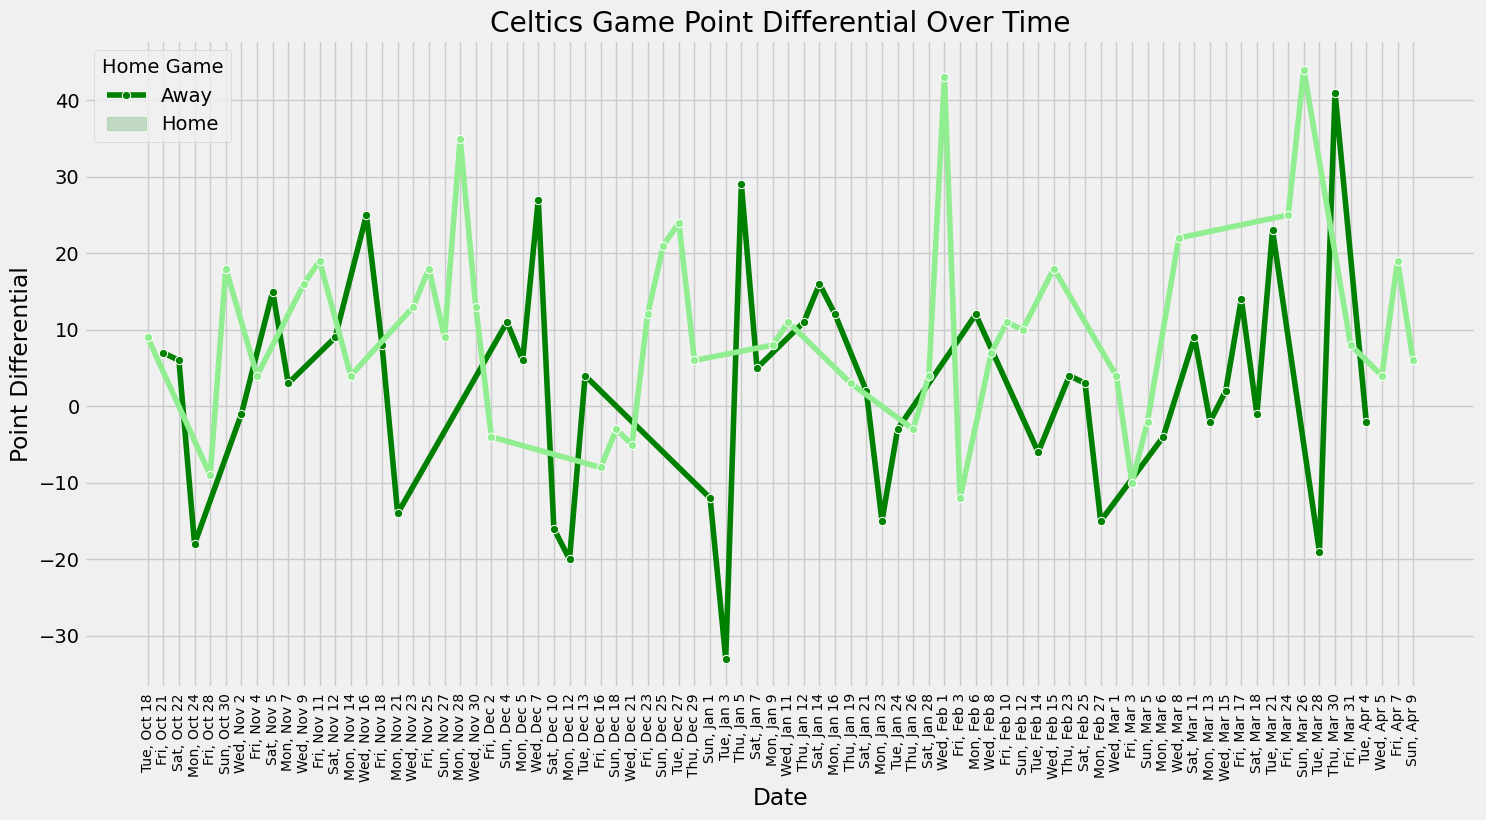

In [53]:
plt.figure(figsize=(16, 8))

sns.lineplot(x='DATE', y='POINT DIFF', hue='HOME', data=celtics_games, palette=['green', 'lightgreen'], marker='o')
plt.title('Celtics Game Point Differential Over Time')
plt.xlabel('Date')
plt.ylabel('Point Differential')
plt.xticks(rotation='vertical', fontsize=10)
plt.legend(title='Home Game', labels=['Away', 'Home'])
plt.grid(True)

plt.show()

In the line plot comparing the point differentials over time for both Celtics' home and away games, the light green line represents home games, and the dark green line represents away games. The consistent positioning of the light green line above the dark green line strongly suggests that the Celtics consistently performed better in their home games compared to their away games. The visual separation between the two lines signifies a tangible home-court advantage for the Celtics during the season. This addresses the question of whether specific NBA teams demonstrate stronger or weaker homecourt advantages. This consistent trend indicates that the Celtics leveraged their home-court advantage effectively, leading to more favorable point differentials in home games.

This observation aligns with the conventional understanding of home-court advantage in sports, where teams often demonstrate a higher level of confidence and success in front of their home crowd. The line plot serves as a visual representation of the Celtics' ability to capitalize on the supportive atmosphere and familiarity of their home arena to secure positive outcomes in terms of point differentials.

This count plot illustrates the Celtics Home vs. Away wins and losses.

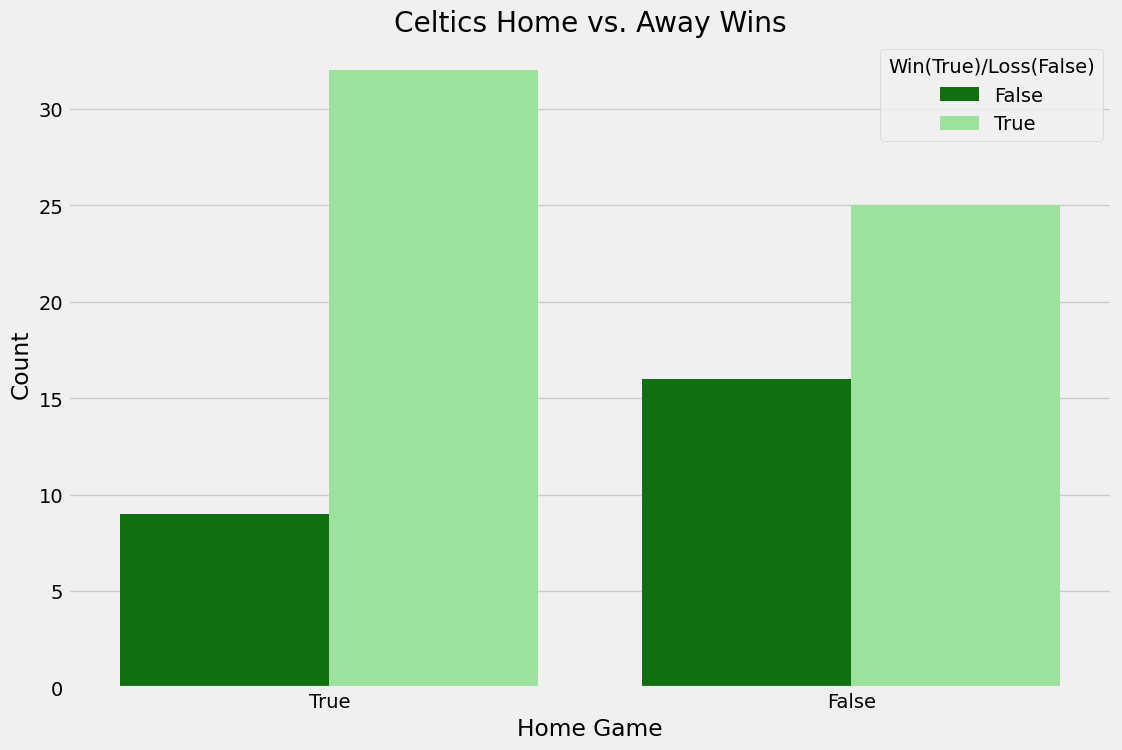

In [54]:
plt.figure(figsize=(12, 8))

sns.countplot(x='HOME', hue='WIN', data=celtics_games, palette=['green', 'lightgreen'], order=[True, False])
plt.title('Celtics Home vs. Away Wins')
plt.xlabel('Home Game')
plt.ylabel('Count')
plt.legend(title='Win(True)/Loss(False)')

plt.show()

The count plot vividly illustrates the stark contrast in the number of wins and losses for the Boston Celtics in home and away games. This provides insights into how homecourt advantage manifests for the Boston Celtics, answering the question of how homecourt advantage influences the season statistics of NBA teams. The plot highlights the Celtics' dominance in terms of wins, particularly in home games, reinforcing the concept of a pronounced home-court advantage. Here's a breakdown of the observations:

**Home Game Wins** (Light Green, True on the x-axis):
* The height of the light green bars on the left side of the plot indicates a substantial number of victories for the Celtics in their home games. This suggests a strong performance and a higher success rate when playing on their home court.

**Home Game Losses** (Green, True on the x-axis):
* While there are losses in home games (green bars on the left side), their height is notably lower than that of the light green bars. This implies that the Celtics experienced fewer defeats in their home games compared to their victories, reinforcing the concept of home-court advantage.

**Away Game Wins** (Light Green, False on the x-axis):
* The light green bars on the right side of the plot represent wins in away games. Although not as tall as the light green bars on the left, they still indicate a considerable number of successes for the Celtics in games played on the road.

**Away Game Losses** (Green, False on the x-axis):
 *  The green bars on the right side represent losses in away games. While there are defeats in away matchups, their height is notably lower than the light green bars on the right, suggesting a more favorable outcome in away games compared to losses.

In summary, the plot emphasizes the Celtics' dominance in terms of wins, particularly in home games, and highlights a relatively lower frequency of losses in both home and away games. This aligns with the notion of a pronounced home-court advantage for the Boston Celtics during the 2022-23 season.

#Dallas Mavericks 2022-23 Season

Shifting our focus from the team analysis of the Boston Celtics, we now turn our attention to a detailed exploration of the Dallas Mavericks' performance during the 2022-23 NBA season. This transition allows us to delve into specific patterns within the Mavericks' game data, providing a more targeted perspective after our broader examination of league-wide trends. Let's embark on this focused exploration of the Dallas Mavericks' 2022-23 season and uncover unique narratives within their game data.


Now, let's load our Mavericks data, organize it, and extract relevant information for our analysis.

In [55]:
mavericks_games = pd.read_html('https://www.espn.com/nba/team/schedule/_/name/dal/season/2023', header=0)

In [56]:
mavericks_games = pd.concat(mavericks_games, ignore_index=True)

In [57]:
mavericks_games.columns = mavericks_games.iloc[0]

In [58]:
mavericks_games = mavericks_games.drop(mavericks_games.index[0])

In [59]:
mavericks_games = mavericks_games.reset_index(drop=True)

In [60]:
mavericks_games.drop(['Hi Points', 'Hi Rebounds', 'Hi Assists'], axis=1, inplace=True)

In [61]:
mavericks_games['WIN'] = mavericks_games['RESULT'].str.startswith('W')

In [62]:
point_diff = mavericks_games['RESULT'].str.extract(r'(\d+)-(\d+)').astype(int)

mavericks_games['POINT DIFF'] = (mavericks_games['WIN'] * (point_diff[0] - point_diff[1])) + ((~mavericks_games['WIN']) * (point_diff[1] - point_diff[0]))

In [63]:
mavericks_games['HOME'] = mavericks_games['OPPONENT'].str.startswith('vs')

In [64]:
mavericks_games.head()

,DATE,OPPONENT,RESULT,W-L,NaN,WIN,POINT DIFF,HOME
0,"Wed, Oct 19",@ Phoenix,L107-105,0-1,NaN,False,-2,False
1,"Sat, Oct 22",vs Memphis,W137-96,1-1,NaN,True,41,True
2,"Tue, Oct 25",@ New Orleans,L113-111,1-2,NaN,False,-2,False
3,"Thu, Oct 27",@ Brooklyn,W129-125 OT,2-2,NaN,True,4,False
4,"Sat, Oct 29",vs Oklahoma City,L117-111 OT,2-3,NaN,False,-6,True


###Visualizing Our Data

We will begin with a bar chart that displays the point differentials for each Dallas Mavericks game over the season.

In [ ]:
plt.figure(figsize=(16, 8))

plt.bar(mavericks_games['DATE'], mavericks_games['POINT DIFF'], color='b')
plt.title('Mavericks Game Point Differential Over Time')
plt.xlabel('Date')
plt.ylabel('Point Differential')
plt.xticks(rotation='vertical', fontsize=10)
plt.grid(True)

plt.show()

The bar chart depicting the Mavericks' game point differentials over time offers a comprehensive overview of the team's performance during the 2022-23 NBA season. The distribution of both positive and negative values highlights the varying degrees of success and challenges faced by the Mavericks in different matchups. While positive differentials reflect instances of notable victories and strong performances, negative values indicate challenging games and potential areas for improvement. This visual representation allows us to identify peaks and troughs in the team's form, providing a clear understanding of their overall trajectory. The variability in point differentials unveils the dynamic nature of the Mavericks' season, enabling basketball enthusiasts to delve into the intricacies of each game and discern patterns that contribute to the team's success or setbacks.

Let's dig a little deeper. We will look at a similar bar chart, but specifically focusing on home game point differention over the season.

In [ ]:
home_games = mavericks_games[mavericks_games['HOME']]

plt.figure(figsize=(16, 8))

plt.bar(home_games['DATE'], home_games['POINT DIFF'], color='b')
plt.title('Mavericks Home Game Point Differential Over Time')
plt.xlabel('Date')
plt.ylabel('Point Differential')
plt.xticks(rotation='vertical', fontsize=10)
plt.grid(True)

plt.show()

The bar chart specifically focusing on the Mavericks' home game point differentials provides a closer look at the team's performance in their familiar environment throughout the 2022-23 NBA season. The predominance of significant positive values indicates instances where the Mavericks secured notable victories on their home court. These peaks underscore the team's ability to capitalize on the advantages of playing in front of their home crowd, showcasing the influence of homecourt advantage. While a few negative values suggest challenging moments, the overall trend emphasizes the Mavericks' proficiency in delivering positive differentials during home games. This visual representation allows fans and analysts to pinpoint specific dates where the team excelled at home, providing valuable insights into the dynamics that contribute to their success in their own arena.

Now that we've seen how the Mavericks have done at home, let's compare the home game point differentials with the away game point differentials in this lineplot.

In [ ]:
plt.figure(figsize=(16, 8))

sns.lineplot(x='DATE', y='POINT DIFF', hue='HOME', data=mavericks_games, palette=['blue', 'lightblue'], marker='o')
plt.title('Mavericks Game Point Differential Over Time')
plt.xlabel('Date')
plt.ylabel('Point Differential')
plt.xticks(rotation='vertical', fontsize=10)
plt.legend(title='Home Game', labels=['Away', 'Home'])
plt.grid(True)

plt.show()

The line plot illustrating Mavericks' game point differentials over time provides insights into the team's performance dynamics in both home and away settings. The consistent positioning of the home line above the away line indicates a general trend of the Mavericks performing better during home games. This provides insights into how homecourt advantage manifests for the Dallas Mavericks, answering the question of how homecourt advantage influences the season statistics of NBA teams.  However, notable dips in the home line suggest specific instances where the team faced challenges or experienced less favorable outcomes at their home court. These fluctuations highlight the variability in performance and prompt a closer examination of the factors influencing the Mavericks' game outcomes. Overall, the line plot serves as a valuable tool for discerning patterns and disparities in point differentials, contributing to a comprehensive understanding of the team's performance throughout the 2022-23 season.

This count plot illustrates the Mavericks Home vs. Away wins and losses.

In [ ]:
plt.figure(figsize=(12, 8))

sns.countplot(x='HOME', hue='WIN', data=mavericks_games, palette=['blue', 'lightblue'], order=[True, False])
plt.title('Mavericks Home vs. Away Wins')
plt.xlabel('Home Game')
plt.ylabel('Count')
plt.legend(title='Win(True)/Loss(False)')

plt.show()

The count plot vividly illustrates the stark contrast in the number of wins and losses for the Dallas Mavericks in home and away games. Here's a breakdown of the observations:

**Home Game Wins** (Light Blue, True on the x-axis):

* The height of the light blue bars on the left side of the plot indicates a substantial number of victories for the Mavericks in their home games. This suggests a strong performance and a higher success rate when playing on their home court.

**Home Game Losses** (Dark Blue, True on the x-axis):

* While there are losses in home games (dark blue bars on the left side), their height is notably lower than that of the light blue bars. This implies that the Mavericks experienced fewer defeats in their home games compared to their victories, reinforcing the concept of home-court advantage.

**Away Game Wins** (Light Blue, False on the x-axis):

* The light blue bars on the right side of the plot represent wins in away games. Although not as tall as the light blue bars on the left, they still indicate a considerable number of successes for the Mavericks in games played on the road.

**Away Game Losses** (Dark Blue, False on the x-axis):

* The dark blue bars on the right side represent losses in away games. Here, dark blue bar significantly surpass the light blue bar. This discrepancy suggests that the Mavericks faced more challenges and experienced a higher number of losses when playing away from their home court.

In summary, the plot emphasizes the Mavericks' dominance in terms of wins, particularly in home games, and highlights the high frequency of losses in away games. This aligns with the notion of a pronounced home-court advantage for the Dallas Mavericks during the 2022-23 season.

#Comparing the Celtics to the Mavericks

Transitioning from the detailed analysis of individual team performances, we now embark on a comparative exploration, juxtaposing the home and away game performances of two notable NBA teams: the Boston Celtics and the Dallas Mavericks. Our focus shifts from singular team dynamics to a side-by-side examination, aiming to discern patterns and disparities between the Celtics and the Mavericks during the 2022-23 season. In this section, we employ key performance metrics, including point differentials, to unveil how these teams navigated the challenges of home and away matchups. The bar chart below presents a visual representation of the number of wins for both teams in their respective home and away games. This comparative analysis promises to offer valuable insights into how these teams leveraged home-court advantage and performed on the road, shedding light on the interplay between team strategies and varying game environments.

In [ ]:
performance_metrics = ['POINT DIFF']

In [ ]:
celtics_home = celtics_games[celtics_games['HOME']]
celtics_away = celtics_games[~celtics_games['HOME']]

celtics_home_wins = celtics_home['WIN'].sum()
celtics_away_wins = celtics_away['WIN'].sum()

In [ ]:
mavericks_home = mavericks_games[mavericks_games['HOME']]
mavericks_away = mavericks_games[~mavericks_games['HOME']]

mavericks_home_wins = mavericks_home['WIN'].sum()
mavericks_away_wins = mavericks_away['WIN'].sum()

In [ ]:
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(2)

plt.bar(index, [celtics_home_wins, celtics_away_wins], bar_width, label='Celtics', color=['green', 'lightgreen'])

plt.bar(index + bar_width, [mavericks_home_wins, mavericks_away_wins], bar_width, label='Mavericks', color=['blue', 'lightblue'])

plt.title('Home vs Away Wins: Celtics vs Mavericks')
plt.xlabel('Location')
plt.ylabel('Number of Wins')
plt.xticks(index + bar_width / 2, ['Home', 'Away'])
plt.legend()

plt.show()

The bar chart provides a succinct comparison between the Boston Celtics and the Dallas Mavericks in terms of home and away game victories during the 2022-23 NBA season. Notably, the Celtics exhibited a higher number of wins in both home and away games compared to the Mavericks. In the realm of home victories, the Celtics outperformed the Mavericks, showcasing a pronounced home-court advantage. Similarly, in away games, the Celtics maintained their superiority over the Mavericks, securing more wins on the road. However, a common trend for both teams emerges—the home environment significantly favored success, with a substantial gap between home and away wins. This emphasizes the impact of home-court advantage on the overall performance of NBA teams, including the Celtics and the Mavericks during the specified season.

#Jayson Tatum 2022-23 Season

Transitioning from the team-level analysis, we now turn our attention to a comprehensive examination of individual player performance. Focusing on Jayson Tatum of the Boston Celtics during the 2022-23 NBA season, we've meticulously compiled game-by-game statistics to unravel the dynamics of his contributions. This dataset is divided into monthly logs, allowing us to discern patterns and variations in Tatum's performance over the course of the season.

To provide a holistic view, we compare Tatum's home and away game performances across various metrics such as minutes played (MIN), field goals made (FG), field goal percentage (FG%), three-pointers made (3PT), three-point percentage (3P%), free throws made (FT), free throw percentage (FT%), rebounds (REB), assists (AST), blocks (BLK), steals (STL), personal fouls (PF), turnovers (TO), and points (PTS). The ensuing analyses include a direct statistical contrast, bar plots illustrating the average values for home and away games, and a chronological depiction of Tatum's point contributions over time.

Through this meticulous exploration, we aim to gain insights into how Jayson Tatum's performance may have been influenced by the home-court advantage and whether discernible patterns emerge in his contributions based on game location. Key performance metrics such as field goal percentage (FG%), three-point percentage (3P%), steals (STL), personal fouls (PF), and points (PTS) will be analyzed to uncover aspects of Tatum's game. Let's delve into the intricate details of Jayson Tatum's performance during the 2022-23 NBA season and uncover the defining characteristics of his impact on the court.

Now, let's load our Jayson Tatum data, organize it, and extract relevant information for our analysis.

In [ ]:
jt_oct = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/4065648/type/nba/year/2023')[10]
jt_nov = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/4065648/type/nba/year/2023')[9]
jt_dec = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/4065648/type/nba/year/2023')[8]
jt_jan = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/4065648/type/nba/year/2023')[7]
jt_feb = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/4065648/type/nba/year/2023')[6]
jt_mar = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/4065648/type/nba/year/2023')[5]
jt_apr = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/4065648/type/nba/year/2023')[4]

jt_szn_avg = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/4065648/type/nba/year/2023')[11]

In [ ]:
jt_oct = jt_oct[::-1].reset_index(drop=True)
jt_nov = jt_nov[::-1].reset_index(drop=True)
jt_dec = jt_dec[::-1].reset_index(drop=True)
jt_jan = jt_jan[::-1].reset_index(drop=True)
jt_feb = jt_feb[::-1].reset_index(drop=True)
jt_mar = jt_mar[::-1].reset_index(drop=True)
jt_apr = jt_apr[::-1].reset_index(drop=True)

In [ ]:
jt_oct.drop(jt_oct.index[0], inplace=True)
jt_nov.drop(jt_nov.index[0], inplace=True)
jt_dec.drop(jt_dec.index[0], inplace=True)
jt_jan.drop(jt_jan.index[0], inplace=True)
jt_feb.drop([jt_feb.index[0], jt_feb.index[8], jt_feb.index[9]], inplace=True)
jt_mar.drop(jt_mar.index[0], inplace=True)
jt_apr.drop(jt_apr.index[0], inplace=True)

In [ ]:
jt_szn = pd.concat([jt_oct, jt_nov, jt_dec, jt_jan, jt_feb, jt_mar, jt_apr], ignore_index=True)

jt_szn.reset_index(drop=True, inplace=True)

In [ ]:
jt_szn['Home Game'] = jt_szn['OPP'].str.startswith('vs')

In [ ]:
jt_szn.head()

In [ ]:
numeric_cols = ['MIN', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']

jt_szn[numeric_cols] = jt_szn[numeric_cols].astype(float)

In [ ]:
jt_home = jt_szn[jt_szn['Home Game']]
jt_home.reset_index(drop=True, inplace=True)

In [ ]:
jt_home.head()

In [ ]:
jt_home_means = jt_home.groupby('Home Game')[numeric_cols].mean().reset_index().round(2)
jt_home_means

In [ ]:
jt_away = jt_szn[~jt_szn['Home Game']]
jt_away.reset_index(drop=True, inplace=True)

In [ ]:
jt_away.head()

In [ ]:
jt_away_means = jt_away.groupby('Home Game')[numeric_cols].mean().reset_index().round(2)
jt_away_means

In [ ]:
jt_comparison_stats = ((jt_home_means[numeric_cols]) - (jt_away_means[numeric_cols])).round(2)
jt_comparison_stats['Home Game'] = jt_home_means['Home Game']
jt_comparison_stats = jt_comparison_stats.set_index('Home Game')

jt_comparison_stats

###Visualizing Our Data

Let's begin with a bar plot of Jayson Tatum's Home vs Away performance metrics.

In [ ]:
jt_comparison_stats.plot(kind='bar', figsize=(12, 8), colormap='Greens')

plt.title('Jayson Tatum - Home vs Away Game Performance Comparison')
plt.xlabel('Home Game')
plt.ylabel('Difference in Performance')
plt.xticks(rotation='horizontal')
plt.legend(loc='upper right')

plt.show()

The bar plot provides a detailed comparison of Jayson Tatum's performance metrics in home and away games during the 2022-23 NBA season. Each metric is represented by a distinct bar, with positive values indicating a higher average in home games compared to away games. Notably, Tatum exhibits substantial superiority in field goal percentage (FG%) and points (PTS), with these metrics significantly higher in home contests. This suggests that Tatum tends to be more accurate in his shooting and contributes more points when playing on his home court.

Additionally, three-point percentage (3P%), steals (STL), personal fouls (PF), and points all showcase positive differences in home games. The positive differential in steals implies that Tatum is more effective in creating defensive opportunities in front of the home crowd. However, it's crucial to note a significant negative difference in free throw percentage (FT%), indicating that Tatum's performance at the free-throw line is comparatively weaker in home games than away games. This analysis provides a detailed understanding of Tatum's strengths and areas for improvement in different game environments.

Next is a bar chart similar to the one above, but showing the side-by-side comparison of all performance metrics for Jayson Tatum in Home games vs Away games.

In [ ]:
home_means_jt = jt_home_means.set_index('Home Game').loc[True]
away_means_jt = jt_away_means.set_index('Home Game').loc[False]

plt.figure(figsize=(12, 8))

bar_width = 0.35
index = range(len(numeric_cols))

plt.bar(index, home_means_jt, bar_width, label='Home', color='green')
plt.bar([i + bar_width for i in index], away_means_jt, bar_width, label='Away', color='lightgreen')

plt.xlabel('Performance Metrics')
plt.ylabel('Average')
plt.title('Performance Comparison: Home vs Away')
plt.xticks([i + bar_width/2 for i in index], numeric_cols)
plt.legend()

plt.show()

This bar chart provides a comprehensive side-by-side comparison of all performance metrics for Jayson Tatum in home games versus away games. The metrics include minutes played (MIN), field goals made (FG), field goal percentage (FG%), three-pointers made (3PT), three-point percentage (3P%), free throws made (FT), free throw percentage (FT%), rebounds (REB), assists (AST), blocks (BLK), steals (STL), personal fouls (PF), turnovers (TO), and points (PTS).

The chart reveals that most performance metrics exhibit similar values for both home and away games, emphasizing Tatum's consistent contributions regardless of the game environment. However, notable differences are observed in field goal percentage (FG%) and points scored (PTS), which tend to be higher in home games, while free throw percentage (FT%) is slightly higher in away games. This visual representation reaffirms the earlier findings, offering a concise overview of Tatum's performance trends in different game settings.

Next is a plot of Jayson Tatum's points in Home games vs Away games over the 2022-23 season.

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(jt_szn['Date'], jt_szn['PTS'], linewidth=0)
plt.plot(jt_home['Date'], jt_home['PTS'], color='green', marker='o', linestyle='-', label='Home Points', linewidth=2)
plt.plot(jt_away['Date'], jt_away['PTS'], color='lightgreen', marker='o', linestyle='-', label='Away Points', linewidth=2)

plt.title('Jayson Tatum - Points Over Time')
plt.xlabel('Date')
plt.ylabel('Points')
plt.xticks(rotation='vertical', fontsize=10)
plt.legend()

plt.show()

This graph illustrates the trend of Jayson Tatum's points in home games versus away games over the course of the 2022-23 NBA season. The plot displays the total points scored by Tatum in each game, with distinct lines for home points (dark green) and away points (light green).

The visual representation clearly demonstrates a consistent pattern where the dark green line, representing points scored in home games, consistently surpasses the light green line, denoting points scored in away games. This observation suggests that Tatum tends to have higher scoring performances when playing on the home court throughout the season. The graph provides a chronological perspective, allowing for a visual understanding of the variations in Tatum's scoring output based on the game location.

Lastly, we show a bar plot indicating the average points scored during the 2022-23 season by Jayson Tatum in Home games vs Away games.

In [ ]:
jt_avg_points = jt_szn.groupby('Home Game')['PTS'].mean().reset_index()

plt.figure(figsize=(12, 8))

sns.barplot(x='Home Game', y='PTS', data=jt_avg_points, order=[True, False], palette=['green', 'lightgreen'])
plt.title('Average Points for Jayson Tatum (Home vs Away)')

plt.show()

This bar plot provides a clear comparison of the average points scored by Jayson Tatum in home games versus away games throughout the 2022-23 NBA season. The plot distinguishes between the two game environments, with dark green representing home games and light green representing away games.

The visual representation highlights a substantial difference in the average points scored by Tatum in these two settings. The dark green bar, signifying home games, is notably higher than the light green bar, indicating away games. This disparity suggests that, on average, Tatum consistently achieves a higher scoring output when playing on the home court compared to away matchups. The bar plot offers a concise summary of the scoring trends, emphasizing the impact of the game location on Jayson Tatum's offensive performance during the 2022-23 season.

In [ ]:
jt_szn_avg['Home Games'] = jt_szn['Home Game'].sum()
jt_szn_avg.loc[jt_szn_avg['Regular Season Stats'] == 'Averages', 'Home Games'] = round(jt_szn['Home Game'].mean(), 2)

jt_szn_avg['Away Games'] = (~jt_szn['Home Game']).sum()
jt_szn_avg.loc[jt_szn_avg['Regular Season Stats'] == 'Averages', 'Away Games'] = round((~jt_szn['Home Game']).mean(), 2)

In [ ]:
jt_szn_avg

The provided table presents the actual averages and totals of Jayson Tatum's performance statistics during the regular season of the 2022-23 NBA season. The "Averages" row provides the mean values for various metrics, including minutes played (MIN), field goals made (FG), field goal percentage (FG%), three-pointers made (3PT), three-point percentage (3P%), free throws made (FT), free throw percentage (FT%), rebounds (REB), assists (AST), blocks (BLK), steals (STL), personal fouls (PF), turnovers (TO), and points (PTS). Additionally, the "Totals" row displays the cumulative values for these metrics over the course of the entire regular season. These figures offer a comprehensive overview of Jayson Tatum's overall contributions during the specified period.

#Luka Doncic 2022-23 Season

Transitioning from the individual player analysis of Jayson Tatum, we now shift our focus to another prominent NBA talent: Luka Doncic. This dataset delves into Luka Doncic's game-by-game performance during the 2022-23 NBA season, providing a comprehensive breakdown across various metrics. The data is organized into monthly logs, allowing us to scrutinize Doncic's contributions over the course of the season.

In this detailed exploration, we compare Luka Doncic's performance in home and away games across key statistical categories, including minutes played (MIN), field goal percentage (FG%), three-point percentage (3P%), free throw percentage (FT%), rebounds (REB), assists (AST), blocks (BLK), steals (STL), personal fouls (PF), turnovers (TO), and points (PTS). The subsequent analyses feature a direct statistical contrast, bar plots illustrating the average values for home and away games, and a chronological representation of Doncic's point contributions over time.

By examining these performance metrics, we aim to unravel the details of Luka Doncic's impact on the court, discern any discernible patterns based on game location, and provide valuable insights into how external factors, such as playing at home or away, may influence an elite player's performance. Let's embark on a detailed exploration of Luka Doncic's 2022-23 NBA season and unravel the distinctive narratives within his game data.

Now, let's load our Luka Doncic data, organize it, and extract relevant information for our analysis.

In [ ]:
ld_oct = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/3945274/type/nba/year/2023')[6]
ld_nov = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/3945274/type/nba/year/2023')[5]
ld_dec = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/3945274/type/nba/year/2023')[4]
ld_jan = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/3945274/type/nba/year/2023')[3]
ld_feb = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/3945274/type/nba/year/2023')[2]
ld_mar = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/3945274/type/nba/year/2023')[1]
ld_apr = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/3945274/type/nba/year/2023')[0]

ld_szn_avg = pd.read_html('https://www.espn.com/nba/player/gamelog/_/id/3945274/type/nba/year/2023')[7]

In [ ]:
ld_oct = ld_oct[::-1].reset_index(drop=True)
ld_nov = ld_nov[::-1].reset_index(drop=True)
ld_dec = ld_dec[::-1].reset_index(drop=True)
ld_jan = ld_jan[::-1].reset_index(drop=True)
ld_feb = ld_feb[::-1].reset_index(drop=True)
ld_mar = ld_mar[::-1].reset_index(drop=True)
ld_apr = ld_apr[::-1].reset_index(drop=True)

In [ ]:
ld_oct.drop(ld_oct.index[0], inplace=True)
ld_nov.drop(ld_nov.index[0], inplace=True)
ld_dec.drop(ld_dec.index[0], inplace=True)
ld_jan.drop(ld_jan.index[0], inplace=True)
ld_feb.drop([ld_feb.index[0], ld_feb.index[5], ld_feb.index[6]], inplace=True)
ld_mar.drop(ld_mar.index[0], inplace=True)
ld_apr.drop(ld_apr.index[0], inplace=True)

In [ ]:
ld_szn = pd.concat([ld_oct, ld_nov, ld_dec, ld_jan, ld_feb, ld_mar, ld_apr], ignore_index=True)

ld_szn.reset_index(drop=True, inplace=True)

In [ ]:
ld_szn.head()

In [ ]:
ld_szn['Home Game'] = ld_szn['OPP'].str.startswith('vs')

In [ ]:
ld_szn.head()

In [ ]:
numeric_cols = ['MIN', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']

ld_szn[numeric_cols] = ld_szn[numeric_cols].astype(float)

In [ ]:
ld_home = ld_szn[ld_szn['Home Game']]
ld_home.reset_index(drop=True, inplace=True)

In [ ]:
ld_home.head()

In [ ]:
ld_home_means = ld_home.groupby('Home Game')[numeric_cols].mean().reset_index().round(2)
ld_home_means

In [ ]:
ld_away = ld_szn[~ld_szn['Home Game']]
ld_away.reset_index(drop=True, inplace=True)

In [ ]:
ld_away.head()

In [ ]:
ld_away_means = ld_away.groupby('Home Game')[numeric_cols].mean().reset_index().round(2)
ld_away_means

In [ ]:
ld_comparison_stats = ((ld_home_means[numeric_cols]) - (ld_away_means[numeric_cols])).round(2)
ld_comparison_stats['Home Game'] = ld_home_means['Home Game']
ld_comparison_stats = ld_comparison_stats.set_index('Home Game')

ld_comparison_stats

###Visualize Our Data

Let's begin with a bar plot of Luka Doncic's Home vs Away performance metrics.

In [ ]:
ld_comparison_stats.plot(kind='bar', figsize=(12, 8), colormap='Blues')

plt.title('Luka Doncic - Home vs Away Game Performance Comparison')
plt.xlabel('Home Game')
plt.ylabel('Difference in Performance')
plt.xticks(rotation='horizontal')
plt.legend(loc='upper right')

plt.show()

Delving into the intricacies of Luka Doncic's performance, our analysis commences with a visually insightful bar plot, vividly comparing his Home vs Away game metrics. The plot accentuates the disparities in key performance indicators. Notably, metrics such as field goal percentage (FG%), free throw percentage (FT%), and points scored (PTS) emerge as standout performers, showcasing significantly higher positive values in home games. This suggests a heightened level of scoring efficiency and impact when Doncic plays on his home court. On the flip side, the notable negative value appears in minutes played (MIN), indicating that, on average, Doncic spends slightly fewer minutes on the court during away games. This detailed exploration offers an in-depth understanding of the specific facets of Luka Doncic's game that are influenced by the playing environment, providing valuable insights into the dynamics of his on-court contributions.

Next is a bar chart similar to the one above, but showing the side-by-side comparison of all performance metrics for Luka Doncic in Home games vs Away games.

In [ ]:
home_means_ld = ld_home_means.set_index('Home Game').loc[True]
away_means_ld = ld_away_means.set_index('Home Game').loc[False]

plt.figure(figsize=(12, 8))

bar_width = 0.35
index = range(len(numeric_cols))

plt.bar(index, home_means_ld, bar_width, label='Home', color='blue')
plt.bar([i + bar_width for i in index], away_means_ld, bar_width, label='Away', color='lightblue')

plt.xlabel('Performance Metrics')
plt.ylabel('Average Value')
plt.title('Performance Comparison: Home vs Away')
plt.xticks([i + bar_width/2 for i in index], numeric_cols)
plt.legend()

plt.show()

The bar chart above presents a side-by-side comparison of Luka Doncic's performance metrics in Home games versus Away games. Across various aspects such as minutes played, field goal percentage, three-point percentage, free throw percentage, rebounds, assists, blocks, steals, personal fouls, turnovers, and points, the majority of metrics exhibit higher values during Home games. Notably, field goal percentage (FG%), free throw percentage (FT%), and points (PTS) stand out with substantially higher values in Home games. However, metrics like minutes played (MIN), blocks (BLK), and steals (STL) show relatively lower values in Home games compared to Away games. This comparison sheds light on the specific facets of Doncic's performance that are influenced by the playing environment, providing a comprehensive view of his contributions on the court.

Next is a plot of Luka Doncic's points in Home games vs Away games over the 2022-23 season.

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(ld_szn['Date'], ld_szn['PTS'], linewidth=0)
plt.plot(ld_home['Date'], ld_home['PTS'], color='blue', marker='o', linestyle='-', label='Home Points', linewidth=2)
plt.plot(ld_away['Date'], ld_away['PTS'], color='lightblue', marker='o', linestyle='-', label='Away Points', linewidth=2)

plt.title('Luka Doncic - Points Over Time')
plt.xlabel('Date')
plt.ylabel('Points')
plt.xticks(rotation='vertical', fontsize=10)
plt.legend()

plt.show()

The plot above illustrates Luka Doncic's points in Home games compared to Away games throughout the 2022-23 season. The dark blue line represents the points scored in Home games, consistently maintaining higher values than the light blue line, which signifies points scored in Away games. This chronological depiction provides a clear visual representation of Doncic's scoring performance over time, emphasizing the consistent trend of achieving higher point contributions when playing on the home court. The graph offers insights into the dynamics of Doncic's offensive output in different game environments and highlights the notable advantage in scoring during Home games.

Lastly, we show a bar plot indicating the average points scored during the 2022-23 season by Luka Doncic in Home games vs Away games.

In [ ]:
ld_avg_points = ld_szn.groupby('Home Game')['PTS'].mean().reset_index()

plt.figure(figsize=(12, 8))

sns.barplot(x='Home Game', y='PTS', data=ld_avg_points, order=[True, False], palette=['blue', 'lightblue'])
plt.title('Average Points for Luka Doncic (Home vs Away)')

plt.show()

The bar plot above displays the average points scored by Luka Doncic during the 2022-23 season in Home games compared to Away games. The dark blue bar represents the average points in Home games, showcasing a higher value than the light blue bar, which signifies the average points in Away games. This visualization emphasizes that, on average, Luka Doncic consistently scored more points when playing on the home court. The contrast in average point contributions provides a quantitative perspective on the impact of game location on Doncic's offensive performance, reinforcing the notion of a pronounced home-court advantage in terms of scoring for Luka Doncic during the specified NBA season.

In [ ]:
ld_szn_avg['Home Games'] = ld_szn['Home Game'].sum()
ld_szn_avg.loc[ld_szn_avg['Regular Season Stats'] == 'Averages', 'Home Games'] = round(ld_szn['Home Game'].mean(), 2)

ld_szn_avg['Away Games'] = (~ld_szn['Home Game']).sum()
ld_szn_avg.loc[ld_szn_avg['Regular Season Stats'] == 'Averages', 'Away Games'] = round((~ld_szn['Home Game']).mean(), 2)

In [ ]:
ld_szn_avg

The table above presents the actual averages and totals of various performance statistics for Luka Doncic during the 2022-23 NBA season. These figures encompass key metrics such as minutes played (MIN), field goals made (FG), field goal percentage (FG%), three-pointers made (3PT), three-point percentage (3P%), free throws made (FT), free throw percentage (FT%), rebounds (REB), assists (AST), blocks (BLK), steals (STL), personal fouls (PF), turnovers (TO), and points (PTS). Notably, the averages reveal that Luka Doncic demonstrated impressive scoring prowess, leading to an average of 32.4 points per game. Additionally, his well-rounded contributions are evident in the balanced distribution of statistics across various categories.

#Comparing Jayson Tatum to Luke Doncic 2022-23 Season

In this section, we embark on a comparative analysis between two prominent NBA players, Jayson Tatum and Luka Doncic. The visual representation begins with a side-by-side bar chart, providing a comprehensive overview of their performance metrics in both home and away games. By juxtaposing their on-court contributions, we aim to unravel the distinctive playing styles and strengths of Jayson Tatum and Luka Doncic during the 2022-23 NBA season. Let's delve into the details of their performances and identify the areas where each player excelled or faced challenges in different game environments.

The first plot exhibits the average values for various performance metrics, utilizing distinct colors to differentiate between Jayson Tatum (JT) and Luka Doncic (LD) in both home and away settings.

In [ ]:
plt.figure(figsize=(16, 8))

bar_width = 0.2
index = range(len(numeric_cols))

plt.bar(index, home_means_jt, bar_width, label='JT - Home', color='green')
plt.bar([i + bar_width for i in index], away_means_jt, bar_width, label='JT - Away', color='lightgreen')
plt.bar([i + 2 * bar_width for i in index], home_means_ld, bar_width, label='LD - Home', color='blue')
plt.bar([i + 3 * bar_width for i in index], away_means_ld, bar_width, label='LD - Away', color='lightblue')

plt.xlabel('Performance Metrics')
plt.ylabel('Average Value')
plt.title('Performance Comparison: Home vs Away for Jayson Tatum and Luka Doncic')
plt.xticks([i + 1.5 * bar_width for i in index], numeric_cols)
plt.legend()

plt.show()

This graph displays the performance metrics of Jayson Tatum (JT) and Luka Doncic (LD) in both home and away games during the 2022-23 NBA season. Each player's strengths and challenges become evident through the distinctive colors representing home and away settings. The general trend showcases higher average values for both JT and LD in various metrics during home games compared to away games. However, specific variations exist, highlighting unique aspects of their playing styles. Jayson Tatum exhibits a lower free throw percentage (FT%) in home games, while Luka Doncic shows improvement in the same metric during home games. Additionally, Tatum gets fewer rebounds but commits fewer turnovers and has more steals in home games. On the other hand, Doncic gets higher rebounds but faces more turnovers and has less steals in home games. These differences contribute to a clear understanding of the players' performances in different game environments.

The second plot further delves into the differences between the two players, showcasing the specific contrast in performance metrics across categories.

In [ ]:
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(ld_comparison_stats.columns))

plt.bar(index, jt_comparison_stats.iloc[0], bar_width, label='Jayson Tatum', color='green')

plt.bar(index + bar_width, ld_comparison_stats.iloc[0], bar_width, label='Luka Doncic', color='blue')

plt.title('Luka Doncic vs Jayson Tatum - Home vs Away Game Performance Comparison')
plt.xlabel('Performance Metrics')
plt.ylabel('Difference in Performance')
plt.xticks(index + bar_width / 2, ld_comparison_stats.columns)
plt.legend()

plt.show()

The second plot provides a focused examination of the performance disparities between Jayson Tatum (JT) and Luka Doncic (LD) in the context of specific performance metrics. The side-by-side comparison emphasizes the differences in their average values for home and away games across various categories. The green bars represent Jayson Tatum, while the blue bars represent Luka Doncic. The performance metrics, such as minutes played (MIN), field goals made (FG), field goal percentage (FG%), three-pointers made (3PT), three-point percentage (3P%), free throws made (FT), free throw percentage (FT%), rebounds (REB), assists (AST), blocks (BLK), steals (STL), personal fouls (PF), turnovers (TO), and points (PTS), are presented in a clear visual format. Analyzing this graph enables a quick and intuitive understanding of the distinct strengths and weaknesses exhibited by Tatum and Doncic in both home and away game scenarios.

#Unveiling the Impact of Homecourt Advantage in the 2022-23 NBA Season

As we wrap up our exploration of the NBA landscape, the investigation into homecourt advantage emerges as a revealing journey into the dynamics of professional basketball. Using meticulously gathered data from ESPN and applying Python and the Pandas library, our analysis deciphered patterns and disparities across the league.

Our quest for answers to probing questions regarding win-loss records, point differentials, team dynamics, and player performances brought to light the multifaceted nature of homecourt advantage. From straightforward bar plots illustrating the Boston Celtics' dominance at home to straightforward comparisons between players like Jayson Tatum and Luka Doncic, each chart contributed to the comprehensive narrative of how the game unfolds on familiar and foreign courts.

In conclusion, the analysis of homecourt advantage during the 2022-23 NBA season illuminates crucial facets of team and player performances. The charts dissected the influence of the playing environment on win-loss records, point differentials, and statistical outputs. Teams like the Boston Celtics showcased a consistent dominance on their home court, emphasizing the profound impact of homecourt advantage on their overall success. The comparison between Eastern and Western Conferences, as well as the specific manifestations for the Boston Celtics and Dallas Mavericks, unveiled detailed dynamics in homecourt advantage. Moreover, the individual player assessments of Jayson Tatum and Luka Doncic provided a detailed understanding of how MVP-caliber performers are affected by the homecourt setting. Collectively, these visualizations offer a straightforward narrative, highlighting the significance of the homecourt advantage in shaping the outcomes of the 2022-23 NBA season and providing invaluable insights into the intricate dynamics of basketball competitions.

Looking ahead, a deeper exploration could involve a comparative study across multiple NBA seasons to discern trends and variations in the impact of homecourt advantage over time. Additionally, investigating how the absence of a live audience, as seen during seasons affected by external factors like the COVID-19 pandemic, influences homecourt advantage could provide straightforward insights.

Exploring the broader context of homecourt advantage in different sports leagues or delving into the postseason league, where the significance of homecourt advantage often intensifies, could straightforwardly expand the scope of the analysis. Moreover, considering team-specific factors such as fan engagement, arena atmosphere, and travel distances could offer a straightforward understanding of the elements contributing to homecourt advantage.

From an ethical standpoint, addressing potential biases in the data and ensuring fair and unbiased analyses is straightforward. Considering the impact of external factors, such as referee decisions or team dynamics, on homecourt advantage could be relevant. Additionally, acknowledging the limitations of statistical analyses and the potential for misinterpretation is straightforward to maintain the integrity of findings.

Privacy concerns should be straightforwardly considered when dealing with player performance data, ensuring that individual players' information is anonymized and aggregated to prevent unauthorized access or identification. Transparency in data collection methods and acknowledgment of any potential conflicts of interest are essential to uphold straightforward ethical standards in sports analytics. Overall, continued exploration should be straightforwardly conducted with a commitment to fairness, transparency, and ethical considerations, following the ACM Code of Ethics.



